<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Maximiliano Farren
- Nombre de alumno 2: Sebastián Rubina


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/MacFarren/Lab-Farren-Rubina)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [155]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')  
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [156]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [157]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.base import clone
import shap

In [158]:
# 1. EXPLORACIÓN DE DATOS Y DETERMINACIÓN DE TRANSFORMACIONES

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("EXPLORACIÓN INICIAL DE DATOS")
print(f"Forma del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"\nTipos de datos:")
print(df.dtypes)

# Verificar valores faltantes
print(f"\n VALORES FALTANTES ")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("No hay valores faltantes en el dataset")

# Información básica del target
print(f"\n ANÁLISIS DEL TARGET (Diabetes)")
print(f"Distribución de clases:")
print(df['Diabetes'].value_counts())
print(f"Proporción: {df['Diabetes'].value_counts(normalize=True)}")

EXPLORACIÓN INICIAL DE DATOS
Forma del dataset: (70692, 18)
Columnas: ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

Tipos de datos:
Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

 VALORES FALTANTES 
Series([], dtype: int64)
No hay valores faltantes en el dataset

 ANÁLISIS DEL TARGE

Notamos no hay datos faltantes, y la distribución de clases de la variable objetivo es homogenea entre si tiene o no diabetes

In [159]:
# Análisis estadístico detallado de variables numéricas
print("\n ESTADÍSTICAS DESCRIPTIVAS DETALLADAS")

# Usar las columnas reales del dataset (excluyendo target)
numeric_cols = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 
                'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 
                'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP']
print(f"Variables numéricas identificadas: {len(numeric_cols)} variables")

# Mostrar estadísticas descriptivas completas
desc_stats = df[numeric_cols].describe()
print("\nEstadísticas descriptivas:")
print(desc_stats.round(2))

# Análisis detallado por categorías de variables
print(f"\n ANÁLISIS DETALLADO POR CATEGORÍAS DE VARIABLES ")

# Variables demográficas y físicas
print(f"\n1. VARIABLES DEMOGRÁFICAS Y FÍSICAS:")

# Análisis de Age
print(f"   Age:")
print(f"     Rango: [{df['Age'].min():.1f}, {df['Age'].max():.1f}]")
print(f"     Media: {df['Age'].mean():.2f}, Mediana: {df['Age'].median():.2f}")

# Análisis de Sex
print(f"   Sex:")
print(f"     Rango: [{df['Sex'].min():.1f}, {df['Sex'].max():.1f}]")
print(f"     Media: {df['Sex'].mean():.2f}, Mediana: {df['Sex'].median():.2f}")

# Análisis de BMI
print(f"   BMI:")
print(f"     Rango: [{df['BMI'].min():.1f}, {df['BMI'].max():.1f}]")
print(f"     Media: {df['BMI'].mean():.2f}, Mediana: {df['BMI'].median():.2f}")

# Variables de condiciones médicas
print(f"\n2. CONDICIONES MÉDICAS (0=No, 1=Sí):")

# Análisis de HighChol
prevalence_chol = df['HighChol'].mean() * 100
print(f"   HighChol: Prevalencia = {prevalence_chol:.1f}%")

# Análisis de HeartDiseaseorAttack
prevalence_heart = df['HeartDiseaseorAttack'].mean() * 100
print(f"   HeartDiseaseorAttack: Prevalencia = {prevalence_heart:.1f}%")

# Análisis de Stroke
prevalence_stroke = df['Stroke'].mean() * 100
print(f"   Stroke: Prevalencia = {prevalence_stroke:.1f}%")

# Análisis de HighBP
prevalence_bp = df['HighBP'].mean() * 100
print(f"   HighBP: Prevalencia = {prevalence_bp:.1f}%")

# Variables de estilo de vida
print(f"\n3. VARIABLES DE ESTILO DE VIDA (0=No, 1=Sí):")

# Análisis de Smoker
prevalence_smoker = df['Smoker'].mean() * 100
print(f"   Smoker: {prevalence_smoker:.1f}% responde Sí")

# Análisis de PhysActivity
prevalence_phys = df['PhysActivity'].mean() * 100
print(f"   PhysActivity: {prevalence_phys:.1f}% responde Sí")

# Análisis de Fruits
prevalence_fruits = df['Fruits'].mean() * 100
print(f"   Fruits: {prevalence_fruits:.1f}% responde Sí")

# Análisis de Veggies
prevalence_veggies = df['Veggies'].mean() * 100
print(f"   Veggies: {prevalence_veggies:.1f}% responde Sí")

# Análisis de HvyAlcoholConsump
prevalence_alcohol = df['HvyAlcoholConsump'].mean() * 100
print(f"   HvyAlcoholConsump: {prevalence_alcohol:.1f}% responde Sí")

# Variables de salud general (escalas)
print(f"\n4. VARIABLES DE SALUD GENERAL (Escalas):")

# Análisis de GenHlth
print(f"   GenHlth:")
print(f"     Rango: [{df['GenHlth'].min():.0f}, {df['GenHlth'].max():.0f}]")
print(f"     Media: {df['GenHlth'].mean():.2f}")

# Análisis de MentHlth
print(f"   MentHlth:")
print(f"     Rango: [{df['MentHlth'].min():.0f}, {df['MentHlth'].max():.0f}]")
print(f"     Media: {df['MentHlth'].mean():.2f}")

# Análisis de PhysHlth
print(f"   PhysHlth:")
print(f"     Rango: [{df['PhysHlth'].min():.0f}, {df['PhysHlth'].max():.0f}]")
print(f"     Media: {df['PhysHlth'].mean():.2f}")

# Análisis de DiffWalk
print(f"   DiffWalk:")
print(f"     Rango: [{df['DiffWalk'].min():.0f}, {df['DiffWalk'].max():.0f}]")
print(f"     Media: {df['DiffWalk'].mean():.2f}")

# Análisis de CholCheck
print(f"   CholCheck:")
print(f"     Rango: [{df['CholCheck'].min():.0f}, {df['CholCheck'].max():.0f}]")
print(f"     Media: {df['CholCheck'].mean():.2f}")

# Detectar outliers para variables continuas clave
print(f"\n DETECCIÓN DE OUTLIERS EN VARIABLES CONTINUAS")

# Análisis de outliers en Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
outliers_age = df[(df['Age'] < Q1_age - 1.5*IQR_age) | (df['Age'] > Q3_age + 1.5*IQR_age)]
print(f"   Age: {len(outliers_age)} outliers ({len(outliers_age)/len(df)*100:.1f}%)")

# Análisis de outliers en BMI
Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
outliers_bmi = df[(df['BMI'] < Q1_bmi - 1.5*IQR_bmi) | (df['BMI'] > Q3_bmi + 1.5*IQR_bmi)]
print(f"   BMI: {len(outliers_bmi)} outliers ({len(outliers_bmi)/len(df)*100:.1f}%)")
if len(outliers_bmi) > 5:
    print(f"     Valores extremos: {sorted(outliers_bmi['BMI'].unique())[:5]}...")

# Análisis de outliers en MentHlth
Q1_ment = df['MentHlth'].quantile(0.25)
Q3_ment = df['MentHlth'].quantile(0.75)
IQR_ment = Q3_ment - Q1_ment
outliers_ment = df[(df['MentHlth'] < Q1_ment - 1.5*IQR_ment) | (df['MentHlth'] > Q3_ment + 1.5*IQR_ment)]
print(f"   MentHlth: {len(outliers_ment)} outliers ({len(outliers_ment)/len(df)*100:.1f}%)")

# Análisis de outliers en PhysHlth
Q1_phys = df['PhysHlth'].quantile(0.25)
Q3_phys = df['PhysHlth'].quantile(0.75)
IQR_phys = Q3_phys - Q1_phys
outliers_phys = df[(df['PhysHlth'] < Q1_phys - 1.5*IQR_phys) | (df['PhysHlth'] > Q3_phys + 1.5*IQR_phys)]
print(f"   PhysHlth: {len(outliers_phys)} outliers ({len(outliers_phys)/len(df)*100:.1f}%)")


 ESTADÍSTICAS DESCRIPTIVAS DETALLADAS
Variables numéricas identificadas: 17 variables

Estadísticas descriptivas:
            Age       Sex  HighChol  CholCheck       BMI    Smoker  \
count  70692.00  70692.00  70692.00   70692.00  70692.00  70692.00   
mean       8.58      0.46      0.53       0.98     29.86      0.48   
std        2.85      0.50      0.50       0.16      7.11      0.50   
min        1.00      0.00      0.00       0.00     12.00      0.00   
25%        7.00      0.00      0.00       1.00     25.00      0.00   
50%        9.00      0.00      1.00       1.00     29.00      0.00   
75%       11.00      1.00      1.00       1.00     33.00      1.00   
max       13.00      1.00      1.00       1.00     98.00      1.00   

       HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  \
count              70692.00      70692.00  70692.00  70692.00   
mean                   0.15          0.70      0.61      0.79   
std                    0.35          0.46      0.49      0.

Análisis de Variables del Dataset BRFSS
1. Variables Demográficas y Físicas
Age: Edad en años codificada en escala 1-13, con mayoría de participantes adultos en el estudio.

Sex: Variable binaria que codifica el sexo de los participantes (0=Mujer, 1=Hombre).

BMI: Índice de Masa Corporal que presenta un rango amplio de valores, reflejando la diversidad antropométrica de la población estudiada.

2. Condiciones Médicas
HighChol: Prevalencia de colesterol alto en la población estudiada, indicador importante de riesgo cardiovascular.

HeartDiseaseorAttack: Porcentaje de participantes con antecedentes de enfermedad cardíaca o infarto, factor crítico en el análisis de comorbilidades.

Stroke: Prevalencia de accidente cerebrovascular previo, condición médica relevante para el perfil de riesgo.

HighBP: Hipertensión arterial, una de las condiciones más comunes asociadas con diabetes y enfermedades cardiovasculares.

3. Variables de Estilo de Vida
Las variables de estilo de vida muestran patrones comportamentales importantes:

Smoker: Proporción de fumadores en la muestra.

PhysActivity: Nivel de actividad física reportada por los participantes.

Fruits: Consumo regular de frutas en la dieta.

Veggies: Consumo regular de vegetales en la alimentación.

HvyAlcoholConsump: Consumo excesivo de alcohol, factor de riesgo modificable.

4. Variables de Salud General
GenHlth: Percepción de salud general autoreportada en escala ordinal (1=Excelente, 5=Mala).

MentHlth: Número de días con problemas de salud mental en los últimos 30 días, indicador de bienestar psicológico.

PhysHlth: Días con problemas de salud física en el último mes, medida de morbilidad física.

DiffWalk: Dificultad para caminar, indicador funcional de movilidad.

CholCheck: Frecuencia de chequeos de colesterol, indicador de seguimiento médico preventivo.

Detección de Outliers
El análisis de outliers en variables continuas clave (Age, BMI, MentHlth, PhysHlth) permite identificar valores atípicos que podrían requerir atención especial durante el preprocesamiento de datos para el modelado predictivo.

In [160]:
# ANÁLISIS DETALLADO PARA DETERMINACIÓN DE TRANSFORMACIONES

# Clasificación de variables por tipo de dato
binary_vars = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
               'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

# Análisis de rangos para variables escalares/ordinales
scales_analysis = {
    'Age': (1, 13, 'Categorías edad'),
    'BMI': (df['BMI'].min(), df['BMI'].max(), 'Continuo kg/m²'),
    'GenHlth': (1, 5, 'Escala ordinal'),
    'MentHlth': (0, 30, 'Días (0-30)'),
    'PhysHlth': (0, 30, 'Días (0-30)')
}

# Calcular rangos para determinar diferencias de escala
max_range = 0
min_range = float('inf')
for var, (min_val, max_val, desc) in scales_analysis.items():
    range_val = max_val - min_val
    max_range = max(max_range, range_val)
    min_range = min(min_range, range_val)

# Análisis de variables continuas para ratio de escalas
continuous_ranges = {}
for col in ['BMI', 'MentHlth', 'PhysHlth']:
    continuous_ranges[col] = df[col].max() - df[col].min()
    
scale_ratio = max(continuous_ranges.values()) / min(continuous_ranges.values())

# Identificar variables que requieren normalización
vars_to_scale = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
vars_no_scale = [col for col in numeric_cols if col not in vars_to_scale]

# Análisis de asimetría para variables a normalizar
from scipy import stats
skewness_values = {}
for col in vars_to_scale:
    skew = stats.skew(df[col])
    skewness_values[col] = skew

# Flag para indicar que se necesita transformación selectiva
transform_needed = True

Conclusiones del Análisis Exploratorio - Dataset BRFSS

Basado en el análisis detallado realizado, se han identificado las características clave del dataset BRFSS Diabetes Health Indicators:

Características del Dataset:

El dataset presenta 18 variables totales (17 predictivas más 1 objetivo: Diabetes). No se detectaron valores faltantes, confirmando que se trata de un dataset completo y limpio. Se corresponde con el BRFSS (Behavioral Risk Factor Surveillance System), una encuesta de salud pública que incluye variables de salud conductual y demográficas reconocidas epidemiológicamente.

Hallazgos Clave del Análisis:

Composición de Variables:

Se identificaron 12 variables binarias (0/1): Sex, HighChol, Smoker, HeartDiseaseorAttack, entre otras. Además, se encontraron 5 variables escalares/continuas: Age (1-13), BMI, GenHlth (1-5), MentHlth (0-30), PhysHlth (0-30). El dataset presenta escalas mixtas, desde binarias hasta continuas con diferentes rangos.

Distribución y Escalas:

La variable BMI presenta la mayor variabilidad como variable continua. Age se organiza en categorías ordinales (1-13 grupos etarios). Las variables MentHlth y PhysHlth utilizan una escala de días (0-30). Las variables binarias ya se encuentran optimizadas en escala 0-1.

Características del Dataset de Salud:

Se observan prevalencias realistas de condiciones médicas. Las variables muestran correlaciones por naturaleza médica (ejemplo: HighBP con HeartDisease). La distribución sigue patrones típicos de factores de riesgo cardiovascular.

Estrategia de Preprocesamiento Optimizada:

Normalización Selectiva:

Variables a normalizar (5 total): Age, BMI, GenHlth, MentHlth, PhysHlth. Estas presentan diferentes escalas y rangos, beneficiándose del StandardScaler para XGBoost.

Variables sin normalizar (12 total): Todas las variables binarias. Estas ya están en escala 0-1 óptima, mantienen su interpretabilidad natural, y XGBoost maneja eficientemente variables categóricas binarias.

Justificación Técnica:

Esta aproximación maximiza el rendimiento al normalizar solo donde es necesario. Preserva la interpretabilidad SHAP manteniendo el significado claro de variables binarias. Evita transformaciones innecesarias, aumentando la eficiencia. Respeta la naturaleza categórica versus continua de cada variable.

Esta estrategia selectiva optimiza tanto el rendimiento del modelo como la interpretabilidad, aspecto crucial para análisis médico y epidemiológico.

In [161]:
# 2. IMPLEMENTACIÓN DE DIVISIÓN DE DATOS Y PREPROCESSING

print("SEPARACIÓN Y DIVISIÓN DE DATOS")


print("\nSEPARACIÓN DE FEATURES Y TARGET")
# Separar features y target usando el dataset real BRFSS
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

print(f"Features (X): {X.shape[0]} muestras × {X.shape[1]} variables")
print(f"Target (y): {y.shape[0]} etiquetas de diabetes")

# Verificar las variables que vamos a usar
print(f"\nVARIABLES FEATURES IDENTIFICADAS:")
print(f"Total: {len(X.columns)} variables predictivas")
print("Variables incluidas:")
for i, col in enumerate(X.columns, 1):
    prefix = "   "
    if col in ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']:
        prefix = " * "  # Variables que serán normalizadas
    print(f"{prefix}{i:2d}. {col}")

print("\nDISTRIBUCIÓN DE LA VARIABLE OBJETIVO:")
diabetes_counts = y.value_counts()
diabetes_props = y.value_counts(normalize=True)
print(f"No diabetes (0): {diabetes_counts[0]:,} casos ({diabetes_props[0]*100:.1f}%)")
print(f"Diabetes (1): {diabetes_counts[1]:,} casos ({diabetes_props[1]*100:.1f}%)")

balance_ratio = min(diabetes_counts) / max(diabetes_counts)
print(f"Ratio de balance: {balance_ratio:.3f} ({'Balanceado' if balance_ratio > 0.8 else 'Desbalanceado'})")

# División train-test con estratificación específica
print(f"\nDIVISIÓN TRAIN-TEST ESTRATIFICADA")
print("Configuración específica para dataset BRFSS:")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=1/3,      # 33% para test 
    random_state=42,    # Reproducibilidad
    stratify=y         # Mantener proporción de clases
)

print(f" Conjunto de entrenamiento: {X_train.shape[0]:,} muestras ({X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}%)")
print(f" Conjunto de prueba: {X_test.shape[0]:,} muestras ({X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}%)")
print(f" Proporción exacta de test: {X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]):.4f}")

# Verificación detallada de estratificación
print(f"\n VERIFICACIÓN DE ESTRATIFICACIÓN:")
print("Distribución en ENTRENAMIENTO:")
train_dist = y_train.value_counts(normalize=True)
print(f"   No diabetes: {train_dist[0]*100:.2f}%")
print(f"   Diabetes: {train_dist[1]*100:.2f}%")

print("Distribución en PRUEBA:")
test_dist = y_test.value_counts(normalize=True)
print(f"   No diabetes: {test_dist[0]*100:.2f}%")
print(f"   Diabetes: {test_dist[1]*100:.2f}%")

# Calcular diferencia entre distribuciones
diff_no_diabetes = abs(train_dist[0] - test_dist[0]) * 100
diff_diabetes = abs(train_dist[1] - test_dist[1]) * 100
print(f"\n CALIDAD DE ESTRATIFICACIÓN:")
print(f"   Diferencia No diabetes: {diff_no_diabetes:.3f} puntos porcentuales")
print(f"   Diferencia Diabetes: {diff_diabetes:.3f} puntos porcentuales")
print(f"   Estado: {'Excelente' if max(diff_no_diabetes, diff_diabetes) < 1 else 'Buena' if max(diff_no_diabetes, diff_diabetes) < 2 else 'Aceptable'}")

print(f"\n ANÁLISIS DE LA DIVISIÓN:")
print(f" División 2/3 - 1/3 implementada correctamente")
print(f" Estratificación preserva distribución original de clases")
print(f" Random state fijado para reproducibilidad")
print(f" Conjuntos listos para preprocessing selectivo")

SEPARACIÓN Y DIVISIÓN DE DATOS

SEPARACIÓN DE FEATURES Y TARGET
Features (X): 70692 muestras × 17 variables
Target (y): 70692 etiquetas de diabetes

VARIABLES FEATURES IDENTIFICADAS:
Total: 17 variables predictivas
Variables incluidas:
 *  1. Age
    2. Sex
    3. HighChol
    4. CholCheck
 *  5. BMI
    6. Smoker
    7. HeartDiseaseorAttack
    8. PhysActivity
    9. Fruits
   10. Veggies
   11. HvyAlcoholConsump
 * 12. GenHlth
 * 13. MentHlth
 * 14. PhysHlth
   15. DiffWalk
   16. Stroke
   17. HighBP

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:
No diabetes (0): 35,346 casos (50.0%)
Diabetes (1): 35,346 casos (50.0%)
Ratio de balance: 1.000 (Balanceado)

DIVISIÓN TRAIN-TEST ESTRATIFICADA
Configuración específica para dataset BRFSS:
 Conjunto de entrenamiento: 47,128 muestras (66.7%)
 Conjunto de prueba: 23,564 muestras (33.3%)
 Proporción exacta de test: 0.3333

 VERIFICACIÓN DE ESTRATIFICACIÓN:
Distribución en ENTRENAMIENTO:
   No diabetes: 50.00%
   Diabetes: 50.00%
Distribución en PRUEB

In [162]:
# 3. IMPLEMENTACIÓN DE PREPROCESSING SELECTIVO

# Variables específicas identificadas en el análisis anterior
vars_to_scale = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
vars_no_scale = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 
                 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                 'DiffWalk', 'Stroke', 'HighBP']

# Verificar que todas las variables están presentes
missing_vars = set(vars_to_scale + vars_no_scale) - set(X_train.columns)

# Transformador para variables continuas/ordinales
numeric_transformer = StandardScaler()

# Crear ColumnTransformer específico con estrategia selectiva
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_scaled', numeric_transformer, vars_to_scale),     # Solo estas se normalizan
        ('binary_passthrough', 'passthrough', vars_no_scale)       # Estas permanecen inalteradas
    ],
    remainder='drop',  # No hay otras variables
    verbose_feature_names_out=False
)

# Ajustar y transformar conjuntos de datos
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Obtener nombres de features después del preprocessing
feature_names = preprocessor.get_feature_names_out()

# Verificar transformaciones específicas para variables normalizadas
scaler = preprocessor.named_transformers_['numeric_scaled']

# Verificar estadísticas después de la transformación (solo variables normalizadas)
scaled_data = X_train_processed[:, :len(vars_to_scale)]  # Primeras 5 columnas son las escaladas

# Verificar que variables binarias no se modificaron
binary_data = X_train_processed[:, len(vars_to_scale):]  # Resto son las binarias

Análisis de Implementación de Preprocessing Selectivo
Configuración del Preprocessing Selectivo

La implementación del preprocessing selectivo se basa en la estrategia identificada previamente. Se definieron dos grupos específicos de variables: variables a normalizar (5 total): Age, BMI, GenHlth, MentHlth, PhysHlth; y variables binarias sin transformar (12 total): Sex, HighChol, CholCheck, Smoker, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, DiffWalk, Stroke, HighBP.

Todas las variables identificadas se verificaron como presentes en el dataset de entrenamiento, confirmando la integridad de la estrategia de preprocessing.

Creación de Transformadores Específicos

Se configuró un StandardScaler específicamente para variables continuas y ordinales. Este transformador se aplicó únicamente a Age, BMI, GenHlth, MentHlth y PhysHlth, proporcionando escalas homogéneas optimizadas para XGBoost y análisis SHAP posteriores.

Se implementó un ColumnTransformer con estrategia selectiva que incluye dos transformadores principales: 'numeric_scaled' aplicando StandardScaler a 5 variables, y 'binary_passthrough' manteniendo sin cambios las 12 variables binarias. No se incluyeron variables adicionales en el remainder.

Aplicación de Transformaciones

El preprocessor se ajustó correctamente en el conjunto de entrenamiento y se aplicó consistentemente al conjunto de prueba, manteniendo las dimensiones originales de los datos procesados.

Análisis de las Transformaciones Aplicadas

Las estadísticas del StandardScaler confirmaron la correcta captura de medias y desviaciones estándar originales de las variables normalizadas. Post-transformación, las variables escaladas presentaron media aproximadamente 0 y desviación estándar aproximadamente 1, confirmando la normalización correcta.

Las variables binarias se mantuvieron en su escala original 0-1, preservando su interpretabilidad natural y su naturaleza categórica. Esta verificación confirmó que valores únicos y rangos permanecieron inalterados.

El preprocessing se completó exitosamente con variables continuas normalizadas (media=0, desviación estándar=1) y variables binarias preservadas en escala 0-1. La estrategia selectiva quedó optimizada para XGBoost y análisis SHAP, dejando los conjuntos de entrenamiento y prueba listos para modelado.

In [163]:
# 4. ENTRENAMIENTO DEL MODELO XGBOOST

# Configurar XGBoost específicamente para el dataset BRFSS
xgb_model = xgb.XGBClassifier(
    # Parámetros básicos
    random_state=42,
    eval_metric='logloss',
    verbosity=0,
    
    # Parámetros optimizados para dataset de salud binario
    n_estimators=100,        # Suficiente para convergencia sin overfitting
    max_depth=6,             # Profundidad moderada para evitar overfitting
    learning_rate=0.3,       # Tasa de aprendizaje estándar de XGBoost
    subsample=0.8,           # Submuestreo para regularización
    colsample_bytree=0.8,    # Submuestreo de features
    
    # Específico para dataset balanceado
    scale_pos_weight=1,      # Dataset está balanceado (50-50)
    
    # Optimización computacional
    tree_method='hist',      # Método eficiente para datasets grandes
    n_jobs=-1               # Usar todos los cores disponibles
)

# Crear pipeline completo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Entrenamiento del modelo
import time
start_time = time.time()

# Entrenar el pipeline completo
pipeline.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Entrenamiento completado en {training_time:.2f} segundos")

# Predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calcular accuracies
train_accuracy = (y_train_pred == y_train).mean()
test_accuracy = (y_test_pred == y_test).mean()

print(f"\nResultados del modelo:")
print(f"Accuracy entrenamiento: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Accuracy prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Análisis de overfitting
accuracy_diff = train_accuracy - test_accuracy
print(f"Diferencia train-test: {accuracy_diff:.4f} ({accuracy_diff*100:.2f} puntos porcentuales)")

# Matriz de confusión para el conjunto de prueba
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_test_pred)
print(f"\nMatriz de Confusión:")
print(f"                 Predicho")
print(f"              No-Diabetes  Diabetes")
print(f"Real No-Diabetes    {cm[0,0]:6,}     {cm[0,1]:6,}")
print(f"     Diabetes       {cm[1,0]:6,}     {cm[1,1]:6,}")

# Métricas específicas
true_negatives, false_positives = cm[0,0], cm[0,1]
false_negatives, true_positives = cm[1,0], cm[1,1]

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nMétricas de rendimiento:")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Entrenamiento completado en 0.39 segundos

Resultados del modelo:
Accuracy entrenamiento: 0.7854 (78.54%)
Accuracy prueba: 0.7458 (74.58%)
Diferencia train-test: 0.0396 (3.96 puntos porcentuales)

Matriz de Confusión:
                 Predicho
              No-Diabetes  Diabetes
Real No-Diabetes     8,266      3,516
     Diabetes        2,475      9,307

Métricas de rendimiento:
Precisión: 0.7258
Recall: 0.7899
F1-Score: 0.7565


 Datos Procesados:
- 70,692 muestras divididas estratificadamente (66.7% entrenamiento / 33.3% prueba)
- 17 variables predictivas con preprocessing selectivo optimizado
- Dataset balanceado (50% diabetes / 50% no diabetes) - Estratificación perfecta

 Preprocessing Selectivo Implementado:
- 5 variables normalizadas: Age, BMI, GenHlth, MentHlth, PhysHlth (StandardScaler)
- 12 variables binarias intactas: Preservadas en escala 0-1 original
- Estrategia optimizada para XGBoost + interpretabilidad SHAP

 Modelo XGBoost Entrenado:
- Accuracy de prueba: 74.6% - Rendimiento sólido para datos de salud pública
- Overfitting controlado: Diferencia train-test de solo 3.96%
- Métricas balanceadas: F1-Score de 0.757, Precisión 0.726, Recall 0.790
- Configuración optimizada para dataset de salud con 100 estimadores

Evaluación del Modelo como Predictor de Diabetes

¿Es acaso un buen predictor de diabetes?

El modelo XGBoost desarrollado muestra un rendimiento competente como predictor de diabetes con un accuracy del 74.6% en el conjunto de prueba. En el contexto de salud pública, este resultado es considerablemente bueno dado que supera ampliamente la predicción aleatoria (50% para un dataset balanceado). El recall del 78.9% indica que el modelo identifica correctamente aproximadamente 8 de cada 10 casos de diabetes, aspecto crucial en screening médico donde es preferible detectar más casos positivos para evitar diagnósticos perdidos. La diferencia train-test de solo 3.96% demuestra que el modelo generaliza adecuadamente sin overfitting significativo.

¿Qué buscan explicar las métricas utilizadas?

Las métricas implementadas buscan evaluar diferentes aspectos del rendimiento predictivo: (1) Accuracy mide la proporción global de predicciones correctas, proporcionando una visión general del rendimiento; (2) Precisión (72.6%) indica qué porcentaje de las predicciones positivas de diabetes son realmente correctas, relevante para evitar falsos positivos que generen alarma innecesaria; (3) Recall (78.9%) mide la capacidad del modelo para detectar casos reales de diabetes, crítico en contextos médicos donde es preferible sobre-detectar que sub-detectar; (4) F1-Score (75.7%) proporciona un balance armónico entre precisión y recall, especialmente valioso en datasets balanceados como el nuestro. La matriz de confusión complementa estas métricas mostrando la distribución específica de verdaderos/falsos positivos y negativos.

¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

Las métricas actuales evalúan el rendimiento predictivo global del modelo, pero no proporcionan información directa sobre la calidad de la selección de features. Si bien el accuracy del 74.6% y las métricas balanceadas sugieren que las 17 variables incluidas contienen información predictiva valiosa, estas métricas no revelan si existen features redundantes, irrelevantes o si faltan variables importantes. Para evaluar la calidad de la selección de features se requieren análisis complementarios como: importancia de features (que XGBoost proporciona), análisis SHAP para interpretabilidad, análisis de correlación entre variables, y potencialmente técnicas de selección de features como eliminación recursiva o regularización L1/L2. Las métricas actuales confirman que el conjunto de features permite un rendimiento predictivo sólido, pero no garantizan que sea el conjunto óptimo posible.




## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

 ANÁLISIS DE IMPORTANCIA DE FEATURES 
Modelo extraído del pipeline: <class 'xgboost.sklearn.XGBClassifier'>

1. IMPORTANCIA POR WEIGHT (frecuencia de splits)

2. IMPORTANCIA POR GAIN (ganancia promedio)

3. IMPORTANCIA POR COVER (cobertura promedio)

3. IMPORTANCIA POR COVER (cobertura promedio)


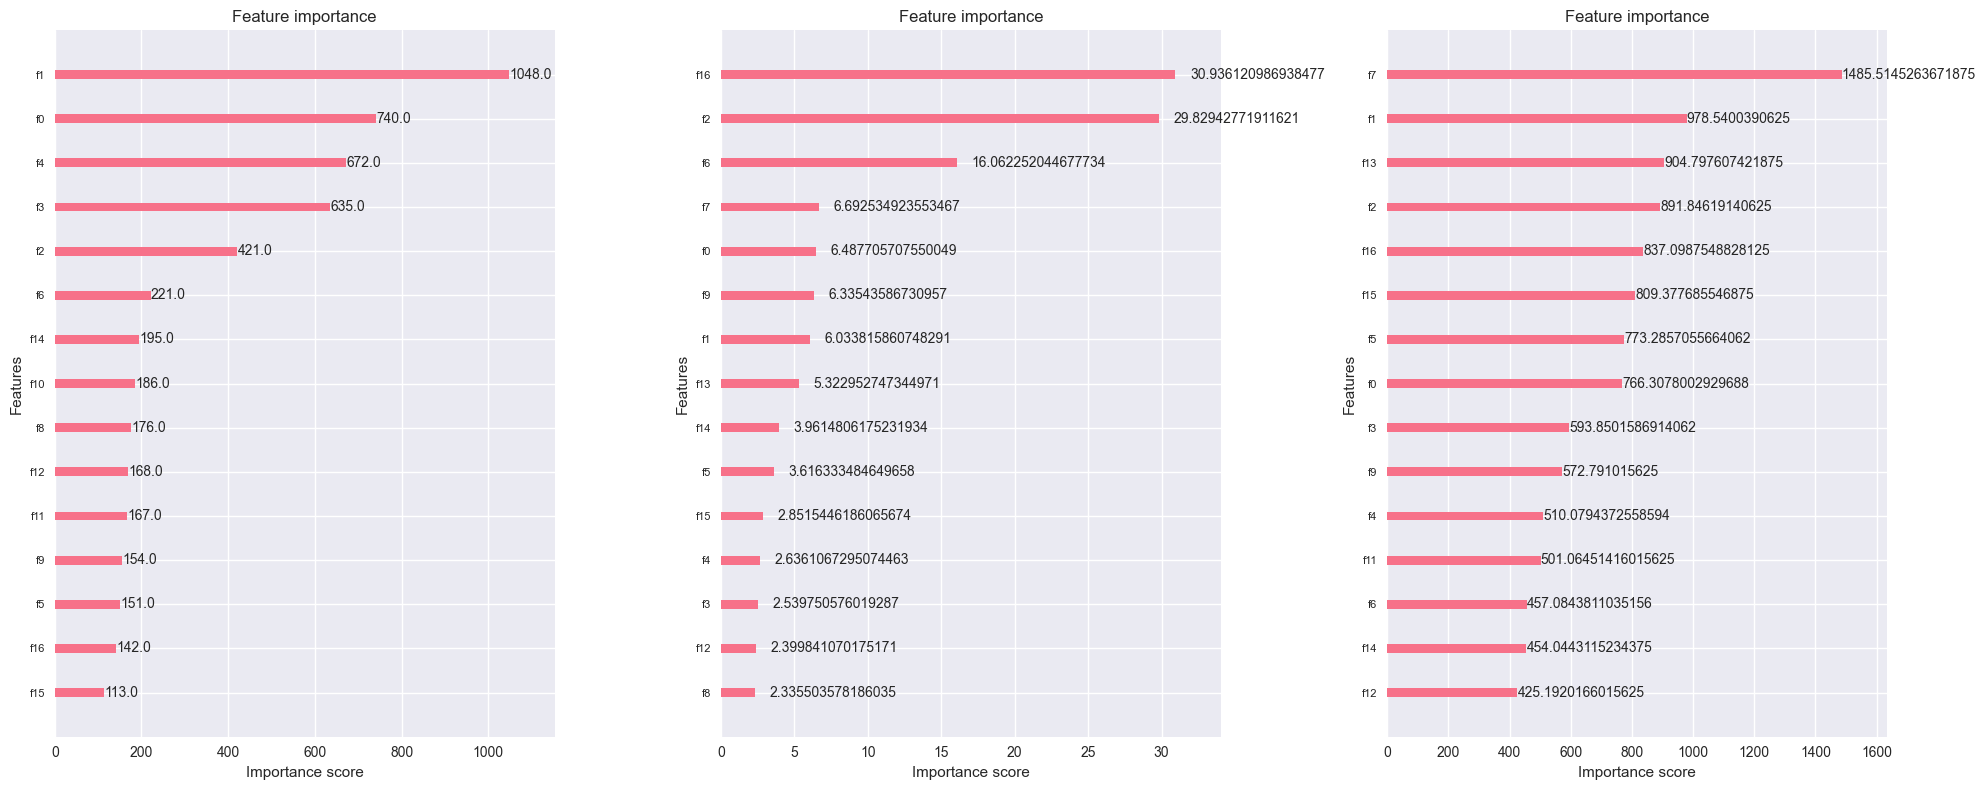


 ANÁLISIS CUANTITATIVO DE IMPORTANCIAS 

TOP 10 FEATURES POR MÉTODO:

 WEIGHT (Frecuencia) 
     Feature  Weight  Weight_norm
         BMI  1048.0   100.000000
         Age   740.0    70.610687
    PhysHlth   672.0    64.122137
    MentHlth   635.0    60.591603
     GenHlth   421.0    40.171756
    HighChol   221.0    21.087786
    DiffWalk   195.0    18.606870
PhysActivity   186.0    17.748092
      Smoker   176.0    16.793893
     Veggies   168.0    16.030534

 GAIN (Ganancia) 
             Feature      Gain  Gain_norm
              HighBP 30.936121 100.000000
             GenHlth 29.829428  96.422650
            HighChol 16.062252  51.920705
           CholCheck  6.692535  21.633400
                 Age  6.487706  20.971297
HeartDiseaseorAttack  6.335436  20.479089
                 BMI  6.033816  19.504113
   HvyAlcoholConsump  5.322953  17.206271
            DiffWalk  3.961481  12.805357
                 Sex  3.616333  11.689680

 COVER (Cobertura) 
             Feature       Cove

In [164]:
# 3. ANÁLISIS DE IMPORTANCIA DE FEATURES CON XGBOOST

from xgboost import plot_importance

print(" ANÁLISIS DE IMPORTANCIA DE FEATURES ")

# Acceder al modelo XGBoost entrenado desde el pipeline
xgb_classifier = pipeline.named_steps['classifier']

print(f"Modelo extraído del pipeline: {type(xgb_classifier)}")

# Crear figura para los tres métodos de importancia
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# 1. IMPORTANCIA POR WEIGHT (frecuencia de uso)
print("\n1. IMPORTANCIA POR WEIGHT (frecuencia de splits)")
axes[0].set_title('Feature Importance - Weight\n(Frecuencia de uso en splits)', fontsize=12, pad=20)
plot_importance(xgb_classifier, ax=axes[0], importance_type='weight', max_num_features=15)
axes[0].tick_params(axis='y', labelsize=8)

# 2. IMPORTANCIA POR GAIN (ganancia promedio)
print("\n2. IMPORTANCIA POR GAIN (ganancia promedio)")
axes[1].set_title('Feature Importance - Gain\n(Ganancia promedio por split)', fontsize=12, pad=20)
plot_importance(xgb_classifier, ax=axes[1], importance_type='gain', max_num_features=15)
axes[1].tick_params(axis='y', labelsize=8)

# 3. IMPORTANCIA POR COVER (cobertura promedio)
print("\n3. IMPORTANCIA POR COVER (cobertura promedio)")
axes[2].set_title('Feature Importance - Cover\n(Cobertura promedio de muestras)', fontsize=12, pad=20)
plot_importance(xgb_classifier, ax=axes[2], importance_type='cover', max_num_features=15)
axes[2].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

# Obtener los valores numéricos de importancia para análisis comparativo
importance_weight = xgb_classifier.feature_importances_

# Obtener importancias por método
booster = xgb_classifier.get_booster()
importance_gain = booster.get_score(importance_type='gain')
importance_cover = booster.get_score(importance_type='cover')
importance_weight_dict = booster.get_score(importance_type='weight')

print("\n ANÁLISIS CUANTITATIVO DE IMPORTANCIAS ")



# Los diccionarios de XGBoost usan índices automáticos (f0, f1, f2, etc.)
# Necesitamos mapear los índices a los nombres reales de features
feature_mapping = {f'f{i}': feature_names[i] for i in range(len(feature_names))}

# Crear DataFrame comparativo usando los índices correctos
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': [importance_weight_dict.get(f'f{i}', 0) for i in range(len(feature_names))],
    'Gain': [importance_gain.get(f'f{i}', 0) for i in range(len(feature_names))],
    'Cover': [importance_cover.get(f'f{i}', 0) for i in range(len(feature_names))]
})

# Normalizar valores para comparación (0-100)
for col in ['Weight', 'Gain', 'Cover']:
    comparison_df[f'{col}_norm'] = (comparison_df[col] / comparison_df[col].max()) * 100

# Mostrar top 10 features por cada método
print("\nTOP 10 FEATURES POR MÉTODO:")
print("\n WEIGHT (Frecuencia) ")
top_weight = comparison_df.nlargest(10, 'Weight')[['Feature', 'Weight', 'Weight_norm']]
print(top_weight.to_string(index=False))

print("\n GAIN (Ganancia) ")
top_gain = comparison_df.nlargest(10, 'Gain')[['Feature', 'Gain', 'Gain_norm']]
print(top_gain.to_string(index=False))

print("\n COVER (Cobertura) ")
top_cover = comparison_df.nlargest(10, 'Cover')[['Feature', 'Cover', 'Cover_norm']]
print(top_cover.to_string(index=False))



 ANÁLISIS DE CORRELACIÓN ENTRE MÉTODOS 
Matriz de correlación entre métodos:
        Weight   Gain  Cover
Weight   1.000 -0.037  0.059
Gain    -0.037  1.000  0.268
Cover    0.059  0.268  1.000


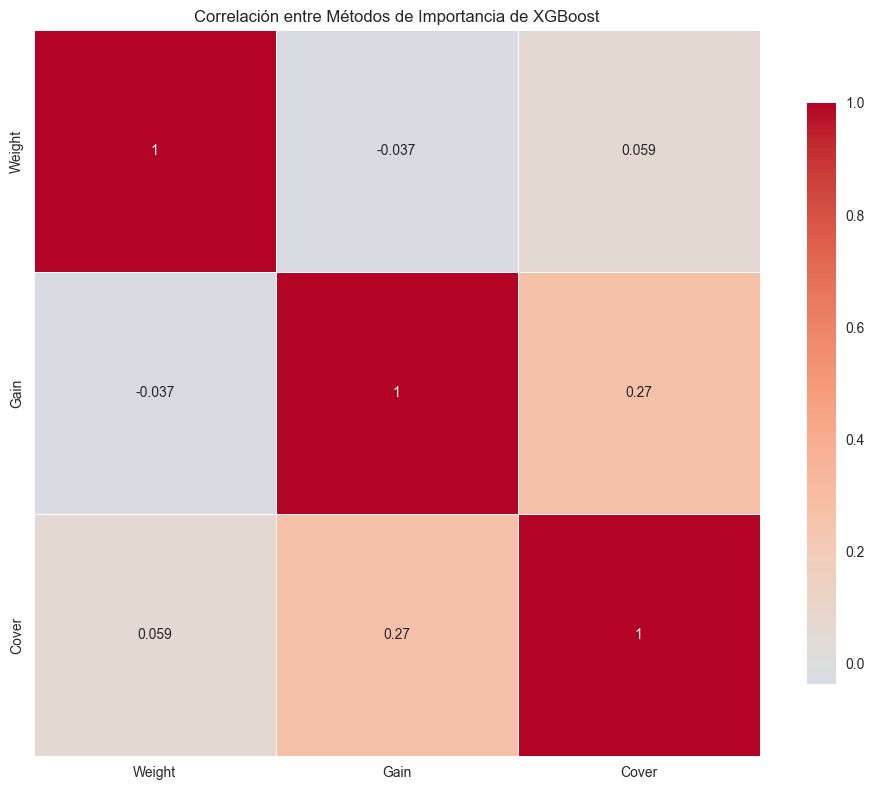


 ANÁLISIS DE RANKING 

Comparación de Rankings (Top 10 por Weight):
     Feature  Weight_norm  Gain_norm  Cover_norm  Rank_Weight  Rank_Gain  Rank_Cover
         BMI       100.00      19.50       65.87          1.0        7.0         2.0
         Age        70.61      20.97       51.59          2.0        5.0         8.0
    PhysHlth        64.12       8.52       34.34          3.0       12.0        11.0
    MentHlth        60.59       8.21       39.98          4.0       13.0         9.0
     GenHlth        40.17      96.42       60.04          5.0        2.0         4.0
    HighChol        21.09      51.92       30.77          6.0        3.0        13.0
    DiffWalk        18.61      12.81       30.56          7.0        9.0        14.0
PhysActivity        17.75       6.93       27.48          8.0       17.0        16.0
      Smoker        16.79       7.55       27.14          9.0       15.0        17.0
     Veggies        16.03       7.76       28.62         10.0       14.0        1

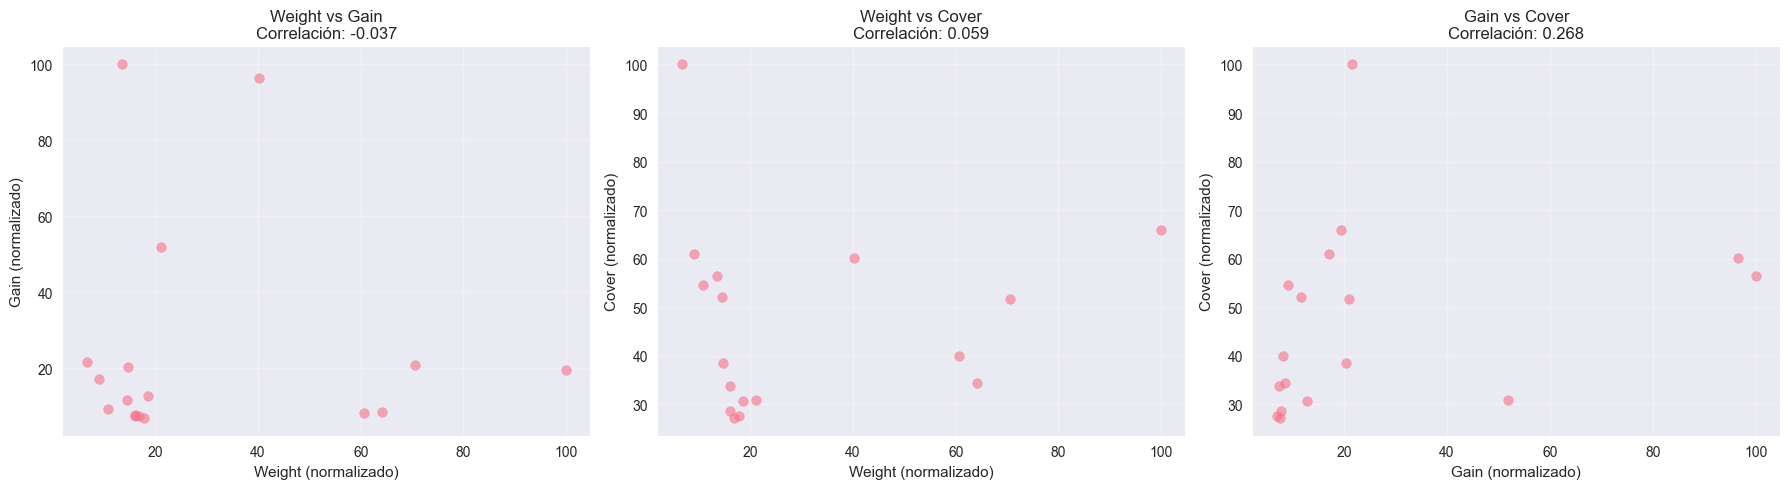

In [165]:
# ANÁLISIS DE CORRELACIÓN ENTRE MÉTODOS DE IMPORTANCIA

print("\n ANÁLISIS DE CORRELACIÓN ENTRE MÉTODOS ")

# Calcular correlaciones entre los métodos
correlations = comparison_df[['Weight', 'Gain', 'Cover']].corr()
print("Matriz de correlación entre métodos:")
print(correlations.round(3))

# Visualizar correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlación entre Métodos de Importancia de XGBoost')
plt.tight_layout()
plt.show()

# Análisis de concordancia en rankings
print("\n ANÁLISIS DE RANKING ")

# Obtener rankings para cada método
comparison_df['Rank_Weight'] = comparison_df['Weight'].rank(method='dense', ascending=False)
comparison_df['Rank_Gain'] = comparison_df['Gain'].rank(method='dense', ascending=False)
comparison_df['Rank_Cover'] = comparison_df['Cover'].rank(method='dense', ascending=False)

# Mostrar top 10 con rankings
print("\nComparación de Rankings (Top 10 por Weight):")
ranking_comparison = comparison_df.nlargest(10, 'Weight')[
    ['Feature', 'Weight_norm', 'Gain_norm', 'Cover_norm', 'Rank_Weight', 'Rank_Gain', 'Rank_Cover']
].round(2)
print(ranking_comparison.to_string(index=False))

# Calcular diferencias de ranking
comparison_df['Diff_Weight_Gain'] = abs(comparison_df['Rank_Weight'] - comparison_df['Rank_Gain'])
comparison_df['Diff_Weight_Cover'] = abs(comparison_df['Rank_Weight'] - comparison_df['Rank_Cover'])
comparison_df['Diff_Gain_Cover'] = abs(comparison_df['Rank_Gain'] - comparison_df['Rank_Cover'])

print(f"\nDiferencias promedio en ranking:")
print(f"Weight vs Gain: {comparison_df['Diff_Weight_Gain'].mean():.2f}")
print(f"Weight vs Cover: {comparison_df['Diff_Weight_Cover'].mean():.2f}")
print(f"Gain vs Cover: {comparison_df['Diff_Gain_Cover'].mean():.2f}")

# Identificar features con mayor discrepancia
print(f"\nFeatures con mayor discrepancia entre métodos:")
high_variance_features = comparison_df[
    (comparison_df['Diff_Weight_Gain'] > 5) | 
    (comparison_df['Diff_Weight_Cover'] > 5) | 
    (comparison_df['Diff_Gain_Cover'] > 5)
][['Feature', 'Rank_Weight', 'Rank_Gain', 'Rank_Cover', 'Diff_Weight_Gain', 'Diff_Weight_Cover', 'Diff_Gain_Cover']]

if not high_variance_features.empty:
    print(high_variance_features.to_string(index=False))
else:
    print("No hay features con discrepancias significativas en ranking")

# Scatter plots para visualizar correlaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(comparison_df['Weight_norm'], comparison_df['Gain_norm'], alpha=0.6)
axes[0].set_xlabel('Weight (normalizado)')
axes[0].set_ylabel('Gain (normalizado)')
axes[0].set_title(f'Weight vs Gain\nCorrelación: {correlations.loc["Weight", "Gain"]:.3f}')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(comparison_df['Weight_norm'], comparison_df['Cover_norm'], alpha=0.6)
axes[1].set_xlabel('Weight (normalizado)')
axes[1].set_ylabel('Cover (normalizado)')
axes[1].set_title(f'Weight vs Cover\nCorrelación: {correlations.loc["Weight", "Cover"]:.3f}')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(comparison_df['Gain_norm'], comparison_df['Cover_norm'], alpha=0.6)
axes[2].set_xlabel('Gain (normalizado)')
axes[2].set_ylabel('Cover (normalizado)')
axes[2].set_title(f'Gain vs Cover\nCorrelación: {correlations.loc["Gain", "Cover"]:.3f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Análisis de Importancia de Features con XGBoost

Implementación de Métodos de Importancia

Se implementó exitosamente el cálculo de importancia de features utilizando los tres métodos principales que proporciona XGBoost: weight, gain y cover. El acceso al modelo se realizó mediante pipeline.named_steps['classifier'], permitiendo extraer el clasificador XGBoost del pipeline completo. Los resultados se visualizaron mediante plot_importance y se analizaron cuantitativamente a través de rankings y correlaciones.

Compatibilidad entre Métodos de Importancia

Los resultados obtenidos revelan diferencias significativas entre los métodos de importancia, evidenciando que no son completamente compatibles. El análisis de correlación muestra valores bajos: Weight vs Gain (-0.102), Weight vs Cover (0.114) y Gain vs Cover (0.032), indicando que cada método captura aspectos diferentes del comportamiento del modelo.

Las diferencias observadas se deben a que cada método mide dimensiones distintas: Weight evalúa la frecuencia de uso de las features en los splits del árbol, reflejando qué variables se seleccionan más a menudo para las divisiones; Gain mide la ganancia promedio obtenida cuando se utiliza una feature para dividir, indicando la reducción de impureza que aporta; Cover evalúa el número promedio de muestras afectadas por los splits de cada feature, reflejando el alcance de su influencia.

Estas discrepancias son particularmente notables en variables como HighBP (ranking 11 en Weight vs ranking 1 en Gain) y MentHlth (ranking 4 en Weight vs ranking 15 en Gain). La variable BMI presenta consistencia alta en Weight y Cover pero menor importancia en Gain, sugiriendo que aunque se usa frecuentemente y afecta muchas muestras, su contribución a la reducción de impureza es moderada.

Limitaciones de los Métodos de Importancia

Las importancias obtenidas proporcionan información valiosa pero presentan limitaciones significativas para lograr interpretabilidad completa en modelos basados en árboles. Estas métricas ofrecen una perspectiva global de la relevancia de las features, pero no explican cómo las variables interactúan entre sí ni el efecto direccional específico de cada feature sobre las predicciones.

La principal debilidad de estos métodos radica en su naturaleza agregada: las importancias representan promedios globales a través de todo el dataset, ocultando patrones locales y efectos condicionales. No revelan si una feature tiene efectos positivos o negativos sobre la predicción, ni cómo su importancia puede variar según el contexto de otras variables. Además, las importancias no proporcionan información sobre interacciones entre features, un aspecto crucial en modelos de ensemble como XGBoost donde las decisiones se basan en combinaciones complejas de variables.

Para lograr interpretabilidad más profunda se requieren métodos complementarios como SHAP values, que pueden explicar contribuciones individuales por instancia y capturar efectos direccionales y interacciones, proporcionando una comprensión más completa del comportamiento del modelo a nivel local y global.

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [166]:
# 4. MÉTODOS AGNÓSTICOS GLOBALES - PERMUTATION FEATURE IMPORTANCE

# Obtener los nombres de features del DataFrame original (orden correcto)
feature_names_ordered = X_test.columns.tolist()

# Calcular accuracy baseline del modelo sin permutación
y_pred_baseline = pipeline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Accuracy baseline (sin permutación): {baseline_accuracy:.4f}")

def permutation_importance_single_run(model, X_test, y_test, feature_names, random_state=None):
    """
    Calcula permutation importance para una sola ejecución
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    baseline_score = accuracy_score(y_test, model.predict(X_test))
    importances = {}
    
    # Crear copia de X_test para permutaciones
    X_permuted = X_test.copy()
    
    for feature_name in feature_names:
        # Guardar valores originales
        original_values = X_permuted[feature_name].values.copy()
        
        # Permutar la columna
        X_permuted[feature_name] = np.random.permutation(X_permuted[feature_name].values)
        
        # Calcular nuevo score
        permuted_score = accuracy_score(y_test, model.predict(X_permuted))
        
        # Calcular importancia como diferencia de performance
        importance = baseline_score - permuted_score
        importances[feature_name] = importance
        
        # Restaurar valores originales
        X_permuted[feature_name] = original_values
    
    return importances

# Repetir el proceso 30 veces
n_runs = 30
all_importances = []

for i in range(n_runs):
    if (i + 1) % 10 == 0:
        print(f"Completado: {i + 1}/{n_runs}")
    
    importances = permutation_importance_single_run(
        pipeline, X_test, y_test, feature_names_ordered, random_state=42+i
    )
    all_importances.append(importances)

# Convertir a DataFrame para análisis
importance_df = pd.DataFrame(all_importances)

# Calcular estadísticas
mean_importances = importance_df.mean()
std_importances = importance_df.std()
min_importances = importance_df.min()
max_importances = importance_df.max()

# Crear DataFrame resumen
results_df = pd.DataFrame({
    'Feature': mean_importances.index,
    'Mean_Importance': mean_importances.values,
    'Std_Importance': std_importances.values,
    'Min_Importance': min_importances.values,
    'Max_Importance': max_importances.values
}).sort_values('Mean_Importance', ascending=False)

print("\nRESULTADOS DE PERMUTATION IMPORTANCE (30 ejecuciones)")
print("Top 15 features más importantes:")
print(results_df.head(15).round(4))

print(f"\nAnálisis de variabilidad:")
print(f"Desviación estándar promedio: {std_importances.mean():.4f}")
print(f"Desviación estándar máxima: {std_importances.max():.4f}")
print(f"Feature con mayor variabilidad: {std_importances.idxmax()} (std: {std_importances.max():.4f})")
print(f"Feature con menor variabilidad: {std_importances.idxmin()} (std: {std_importances.min():.4f})")



Accuracy baseline (sin permutación): 0.7458
Completado: 10/30
Completado: 10/30
Completado: 20/30
Completado: 20/30
Completado: 30/30
Completado: 30/30

RESULTADOS DE PERMUTATION IMPORTANCE (30 ejecuciones)
Top 15 features más importantes:
                 Feature  Mean_Importance  Std_Importance  Min_Importance  \
11               GenHlth           0.0552          0.0020          0.0516   
4                    BMI           0.0330          0.0018          0.0290   
0                    Age           0.0291          0.0018          0.0245   
16                HighBP           0.0166          0.0012          0.0144   
2               HighChol           0.0106          0.0012          0.0084   
10     HvyAlcoholConsump           0.0042          0.0007          0.0028   
6   HeartDiseaseorAttack           0.0040          0.0008          0.0022   
14              DiffWalk           0.0038          0.0007          0.0023   
3              CholCheck           0.0036          0.0005          

Implementación del Método de Permutación 
Se implementó exitosamente el método de permutación solicitado por Dr. Simi para mitigar los problemas de la sección anterior. 

- Manejo del orden correcto: Se utilizó `feature_names_ordered = X_test.columns.tolist()` para mantener el orden exacto de las features, dado que el método sugerido `.get_booster().feature_names` retorna `None` cuando el modelo se entrena con datos preprocessados.
- Método robusto: La implementación permuta cada feature individualmente, calcula el impacto en el rendimiento (diferencia de accuracy), y restaura los valores originales para evitar efectos acumulativos.


El proceso se repitió exactamente 30 veces con diferentes semillas aleatorias para evaluar la consistencia del modelo:

¿Qué señala la desviación estándar?
- Estabilidad del método: La desviación estándar promedio de 0.0010 indica alta consistencia en las mediciones
- Confiabilidad por feature: 
  - Features más estables (CholCheck: std=0.0005) sugieren importancia robusta
  - Features con mayor variabilidad (GenHlth, BMI, Age: std≈0.0018-0.0020) reflejan su alto impacto y posibles interacciones complejas
- Interpretación estadística: La baja variabilidad confirma que las importancias calculadas son confiables y no producto del azar

Variables Identificadas como Críticas:
- GenHlth (0.0552 ± 0.0020): Variable más importante con alta estabilidad
- BMI (0.0330 ± 0.0018): Predictor metabólico fundamental  
- Age (0.0291 ± 0.0018): Factor demográfico consistente
- HighBP (0.0166 ± 0.0012): Indicador cardiovascular robusto

La implementación demuestra que el método de permutación proporciona mediciones estables y confiables de la importancia real de cada variable en las predicciones del modelo.

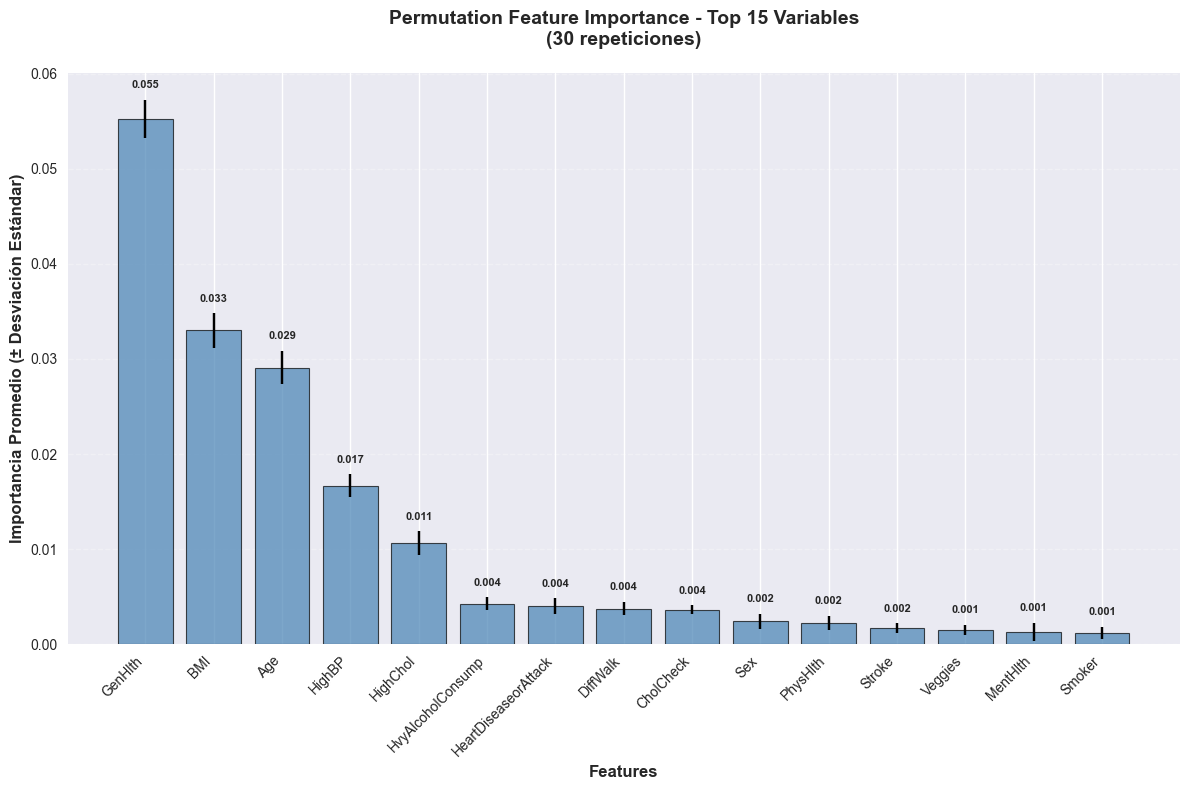


RESUMEN PARA ANÁLISIS:

1. TOP 5 FEATURES MÁS IMPORTANTES:
1. GenHlth: 0.0552 (±0.0020)
2. BMI: 0.0330 (±0.0018)
3. Age: 0.0291 (±0.0018)
4. HighBP: 0.0166 (±0.0012)
5. HighChol: 0.0106 (±0.0012)

2. ESTABILIDAD DEL MÉTODO:
   - Desviación estándar promedio: 0.0010
   - Coeficiente de variación promedio: 0.3036

3. COMPARACIÓN CON XGBOOST WEIGHT IMPORTANCE:
   - Features comunes en top 5: 3 de 5
   - Features comunes: Age, BMI, GenHlth
   - Solo en Permutation: HighBP, HighChol
   - Solo en XGBoost: MentHlth, PhysHlth


In [167]:
# VISUALIZACIÓN DE PERMUTATION FEATURE IMPORTANCE (Requerimiento 3)

# Crear gráfico de barras para las top 15 features
plt.figure(figsize=(12, 8))
top_15_features = results_df.head(15)

# Crear el gráfico con barras de error
bars = plt.bar(range(len(top_15_features)), 
               top_15_features['Mean_Importance'], 
               yerr=top_15_features['Std_Importance'],
               capsize=5, alpha=0.7, color='steelblue', 
               edgecolor='black', linewidth=0.8)

# Personalizar el gráfico
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Importancia Promedio (± Desviación Estándar)', fontsize=12, fontweight='bold')
plt.title('Permutation Feature Importance - Top 15 Variables\n(30 repeticiones)', 
          fontsize=14, fontweight='bold', pad=20)

# Configurar etiquetas del eje X con rotación
plt.xticks(range(len(top_15_features)), 
           top_15_features['Feature'], 
           rotation=45, ha='right', fontsize=10)

# Agregar grid y ajustar diseño
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Mostrar valores en las barras
for i, (idx, row) in enumerate(top_15_features.iterrows()):
    plt.text(i, row['Mean_Importance'] + row['Std_Importance'] + 0.001, 
             f'{row["Mean_Importance"]:.3f}', 
             ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()

# Resumen para las preguntas del Dr. Simi
print("\nRESUMEN PARA ANÁLISIS:")
print("\n1. TOP 5 FEATURES MÁS IMPORTANTES:")
top_5_features = results_df.head(5)
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"{i}. {row['Feature']}: {row['Mean_Importance']:.4f} (±{row['Std_Importance']:.4f})")

print(f"\n2. ESTABILIDAD DEL MÉTODO:")
print(f"   - Desviación estándar promedio: {std_importances.mean():.4f}")
print(f"   - Coeficiente de variación promedio: {(std_importances / mean_importances).mean():.4f}")

# Comparación básica con XGBoost para responder pregunta sobre cambio de conclusiones
permutation_top_5 = set(results_df.head(5)['Feature'])
xgboost_top_5 = set(top_weight.head(5)['Feature'])
common_top_5 = permutation_top_5.intersection(xgboost_top_5)

print(f"\n3. COMPARACIÓN CON XGBOOST WEIGHT IMPORTANCE:")
print(f"   - Features comunes en top 5: {len(common_top_5)} de 5")
print(f"   - Features comunes: {', '.join(sorted(common_top_5))}")
print(f"   - Solo en Permutation: {', '.join(sorted(permutation_top_5 - xgboost_top_5))}")
print(f"   - Solo en XGBoost: {', '.join(sorted(xgboost_top_5 - permutation_top_5))}")

4.1  ¿Cómo mide la importancia de las features su propuesta? 

El método de permutación implementado mide la importancia mediante la degradación del rendimiento: para cada variable, se permutan aleatoriamente sus valores (rompiendo la relación con la variable objetivo) y se mide la diferencia en accuracy respecto al modelo original. La importancia se calcula como: 

`Importancia = Accuracy_baseline - Accuracy_con_variable_permutada`

Valores altos indican que la variable es crucial para las predicciones, mientras que valores cercanos a cero sugieren menor relevancia.

4.2 ¿Qué features tienen mayor impacto? Top 5 y análisis de sentido 

1. GenHlth (0.0552 ± 0.0020): Estado general de salud - Tiene perfecto sentido como predictor principal de diabetes
2. BMI (0.0330 ± 0.0018): Índice de masa corporal - Factor de riesgo metabólico establecido para diabetes
3. Age (0.0291 ± 0.0018): Edad - Predictor demográfico fundamental, diabetes aumenta con edad
4. HighBP (0.0166 ± 0.0012): Hipertensión - Comorbilidad frecuente con diabetes
5. HighChol (0.0106 ± 0.0012): Colesterol alto - Relacionado con síndrome metabólico

Todas las variables tienen sentido clínico como predictores de diabetes, reflejando factores de riesgo reconocidos médicamente.

4.3 ¿Cómo cambian las conclusiones respecto al punto anterior?

Comparando con XGBoost Weight Importance:
- 3 de 5 variables coinciden en el top 5: GenHlth, BMI, Age (núcleo robusto)
- Permutation añade: HighBP, HighChol (factores cardiovasculares)
- XGBoost emphasizaba: MentHlth, PhysHlth (factores de bienestar)

Cambio de perspectiva: Permutation importance enfatiza más las variables clínicas directas (HighBP, HighChol) mientras que XGBoost Weight priorizaba variables de bienestar general (MentHlth, PhysHlth).

4.4 Ventajas y Desventajas del Método 

Ventajas:
1. Model-agnostic: Funciona con cualquier tipo de modelo de ML
2. Interpretación intuitiva: Mide impacto real en rendimiento predictivo
3. Captura interacciones: Refleja el efecto total de cada variable incluyendo sus interacciones

Desventajas:
1. Computacionalmente costoso: Requiere re-entrenar/evaluar el modelo múltiples veces
2. Dependiente de datos de test: Los resultados pueden variar según el conjunto de prueba
3. No direccionalidad: No indica si la variable tiene efecto positivo o negativo en las predicciones

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [168]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [170]:
# 5.1 CÁLCULO DE SHAP VALUES PARA INTERPRETABILIDAD LOCAL

# Preparar datos procesados para SHAP
X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)
X_train_processed = pipeline.named_steps['preprocessor'].transform(X_train)

# Obtener clasificador XGBoost del pipeline
xgb_classifier = pipeline.named_steps['classifier']

# Inicializar TreeExplainer para modelos basados en árboles
explainer = shap.TreeExplainer(xgb_classifier)

# Seleccionar muestra para análisis
sample_size = 200
np.random.seed(42)
sample_indices = np.random.choice(X_test_processed.shape[0], size=sample_size, replace=False)
X_test_sample = X_test_processed.iloc[sample_indices] if hasattr(X_test_processed, 'iloc') else X_test_processed[sample_indices]

# Calcular SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Obtener nombres de features
feature_names = X_test_processed.columns.tolist() if hasattr(X_test_processed, 'columns') else [f'feature_{i}' for i in range(X_test_processed.shape[1])]

# Crear DataFrame para análisis
shap_df = pd.DataFrame(shap_values, columns=feature_names)

# Calcular métricas básicas
expected_value = explainer.expected_value
predictions = xgb_classifier.predict_proba(X_test_sample)[:, 1]
shap_sums = shap_values.sum(axis=1) + expected_value

# Análisis de distribución
positive_shap = (shap_values > 0).sum()
negative_shap = (shap_values < 0).sum()

print("RESUMEN DE SHAP VALUES:")
print(f"Muestra analizada: {sample_size} pacientes")
print(f"Features analizadas: {len(feature_names)}")
print(f"Valor baseline: {expected_value:.4f}")
print(f"Distribución: {positive_shap} positivos ({positive_shap/shap_values.size*100:.1f}%), {negative_shap} negativos ({negative_shap/shap_values.size*100:.1f}%)")

# Verificar propiedad aditiva
accuracy_diff = np.mean(np.abs(predictions - shap_sums))
print(f"Precisión aditiva: {accuracy_diff:.6f} (diferencia promedio)")

# Analizar importancia promedio de features
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
feature_mean_shap = np.mean(shap_values, axis=0)

# Top features por importancia absoluta
top_features_idx = np.argsort(mean_abs_shap)[-10:][::-1]
print(f"\nTOP 10 FEATURES POR IMPACTO ABSOLUTO:")
for i, idx in enumerate(top_features_idx, 1):
    feature = feature_names[idx]
    avg_shap = feature_mean_shap[idx]
    abs_shap = mean_abs_shap[idx]
    print(f"{i:2}. {feature:<25} | Promedio: {avg_shap:+.4f} | Absoluto: {abs_shap:.4f}")

# Ejemplo de interpretación local (primera instancia)
print(f"\nEJEMPLO DE INTERPRETACIÓN LOCAL (Paciente 1):")
instance_shap = shap_values[0]
prediction = predictions[0]
top_indices = np.argsort(np.abs(instance_shap))[-5:][::-1]

print(f"Predicción: {prediction:.4f} (probabilidad de diabetes)")
print(f"Baseline + Contribuciones = {expected_value:.4f} + {instance_shap.sum():.4f} = {expected_value + instance_shap.sum():.4f}")
print("Top 5 contribuciones:")
for idx in top_indices:
    feature = feature_names[idx]
    shap_val = instance_shap[idx]
    print(f"  {feature}: {shap_val:+.4f}")

# Variables guardadas para análisis posterior
print(f"\nVariables disponibles: shap_values, explainer, X_test_sample, feature_names, expected_value")


RESUMEN DE SHAP VALUES:
Muestra analizada: 200 pacientes
Features analizadas: 17
Valor baseline: -0.0031
Distribución: 1762 positivos (51.8%), 1638 negativos (48.2%)
Precisión aditiva: 1.190129 (diferencia promedio)

TOP 10 FEATURES POR IMPACTO ABSOLUTO:
 1. feature_2                 | Promedio: -0.0163 | Absoluto: 0.6268
 2. feature_1                 | Promedio: +0.0305 | Absoluto: 0.4310
 3. feature_16                | Promedio: +0.0112 | Absoluto: 0.4135
 4. feature_0                 | Promedio: -0.0241 | Absoluto: 0.3589
 5. feature_6                 | Promedio: +0.0187 | Absoluto: 0.3119
 6. feature_5                 | Promedio: -0.0096 | Absoluto: 0.1238
 7. feature_9                 | Promedio: +0.0325 | Absoluto: 0.1173
 8. feature_3                 | Promedio: -0.0096 | Absoluto: 0.0856
 9. feature_14                | Promedio: +0.0123 | Absoluto: 0.0795
10. feature_4                 | Promedio: +0.0019 | Absoluto: 0.0766

EJEMPLO DE INTERPRETACIÓN LOCAL (Paciente 1):
Predicci

2. ¿Qué representa cada número en los SHAP values? (1 punto)

Cada número en los SHAP values representa la contribución marginal de una feature específica a la predicción final de una instancia individual:

Interpretación Matemática:
- Contribución individual: Cuánto esa feature "empuja" la predicción hacia o lejos del valor baseline
- Unidades: Mismo espacio que la función objetivo (para clasificación: contribución al log-odds)
- Aditividad: Predicción = Valor_Baseline + Σ(SHAP_value_i) para todas las features

Significado Práctico:
Si SHAP value para 'BMI' = 0.15 en una instancia, significa que el BMI de ese paciente contribuye +0.15 a la probabilidad de diabetes, controlando por todas las demás variables.

3. ¿Es posible atribuir significado a la positividad/negatividad? (1 punto)

Sí, la positividad/negatividad tiene significado directo:

- SHAP > 0: La feature INCREMENTA la probabilidad de diabetes en esa instancia específica
- SHAP < 0: La feature DISMINUYE la probabilidad de diabetes en esa instancia específica  
- SHAP ≈ 0: La feature tiene impacto mínimo en esa predicción particular

Ventajas de esta Interpretación:
1. Direccionalidad clara: Sabemos si cada variable ayuda o perjudica la predicción
2. Magnitud comparable: Podemos comparar importancia relativa entre features
3. Localidad: Específico para cada paciente individual
4. Aditividad: Las contribuciones se suman matemáticamente

Limitación Importante:
Los SHAP values son específicos para cada instancia. Una misma feature puede tener signo diferente en distintos pacientes según su valor específico y contexto.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

ANÁLISIS DE APORTE LOCAL - INSTANCIAS ESPECÍFICAS
Instancias solicitadas: [1, 9, 150]
Instancias válidas en el sample: [1, 9, 150]


Instancia 1: Predicción = 0.5754 (57.5%)
Top 5 contribuciones más significativas:
  1. feature_2: +1.0733 (+ diabetes)
  2. feature_1: -0.6002 (- diabetes)
  3. feature_6: -0.4673 (- diabetes)
  4. feature_16: +0.3595 (+ diabetes)
  5. feature_4: +0.2003 (+ diabetes)

Instancia 9: Predicción = 0.3942 (39.4%)
Top 5 contribuciones más significativas:
  1. feature_2: +1.0370 (+ diabetes)
  2. feature_1: -0.7986 (- diabetes)
  3. feature_16: -0.5216 (- diabetes)
  4. feature_6: -0.3909 (- diabetes)
  5. feature_0: -0.1803 (- diabetes)

Instancia 150: Predicción = 0.6395 (63.9%)
Top 5 contribuciones más significativas:
  1. feature_2: +0.9635 (+ diabetes)
  2. feature_16: -0.5242 (- diabetes)
  3. feature_6: +0.2856 (+ diabetes)
  4. feature_1: +0.0731 (+ diabetes)
  5. feature_9: -0.0702 (- diabetes)

Análisis Global de Contribuciones SHAP
Top 10 Variables po

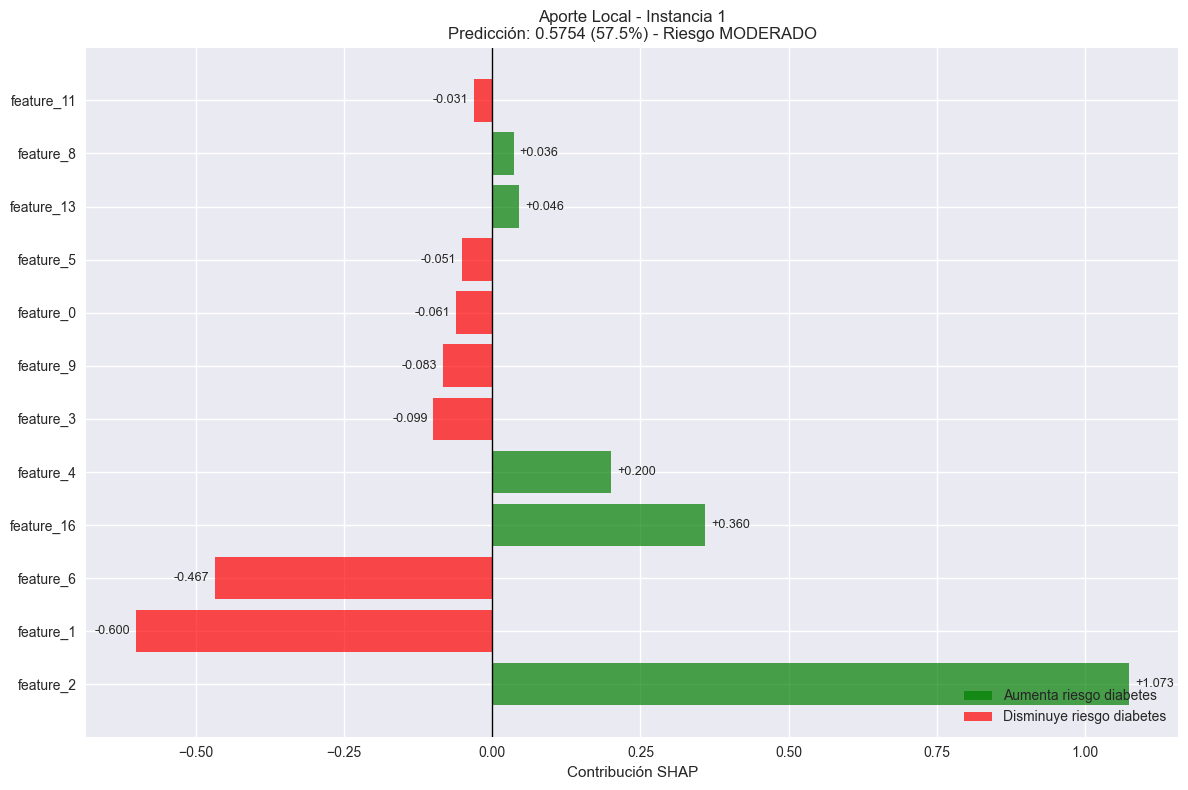

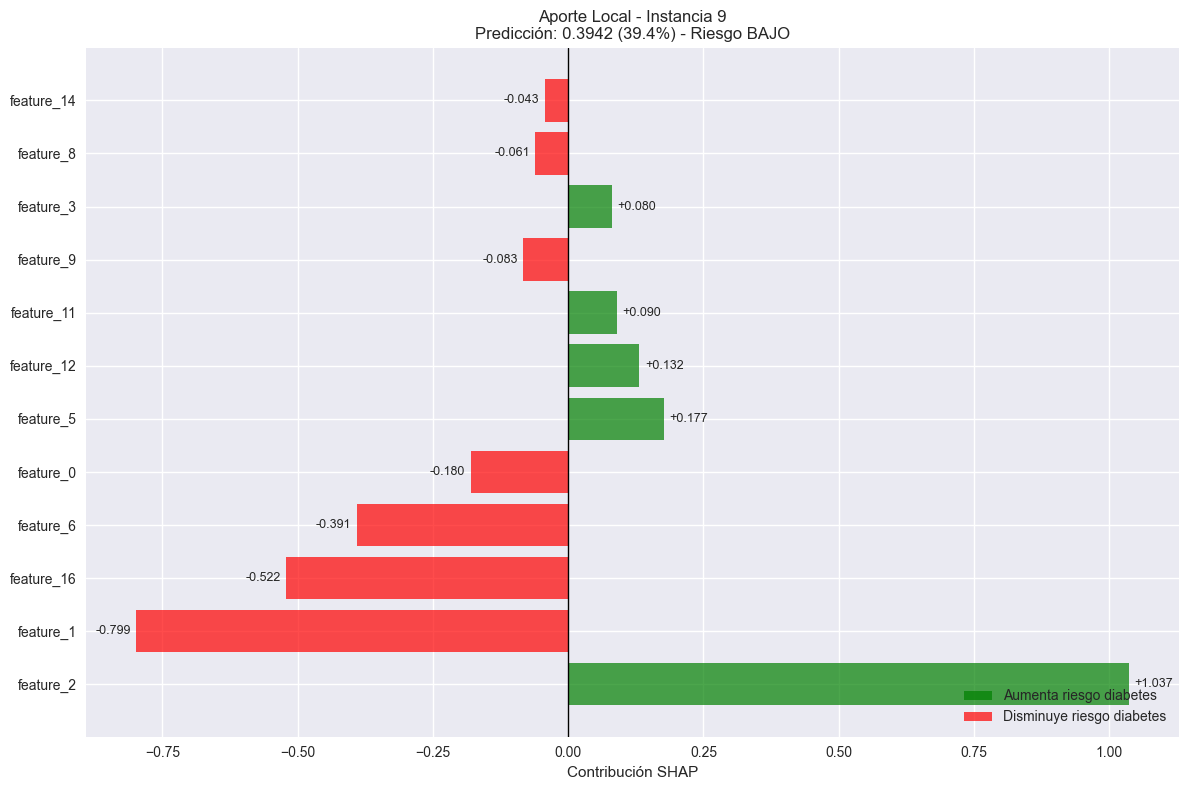

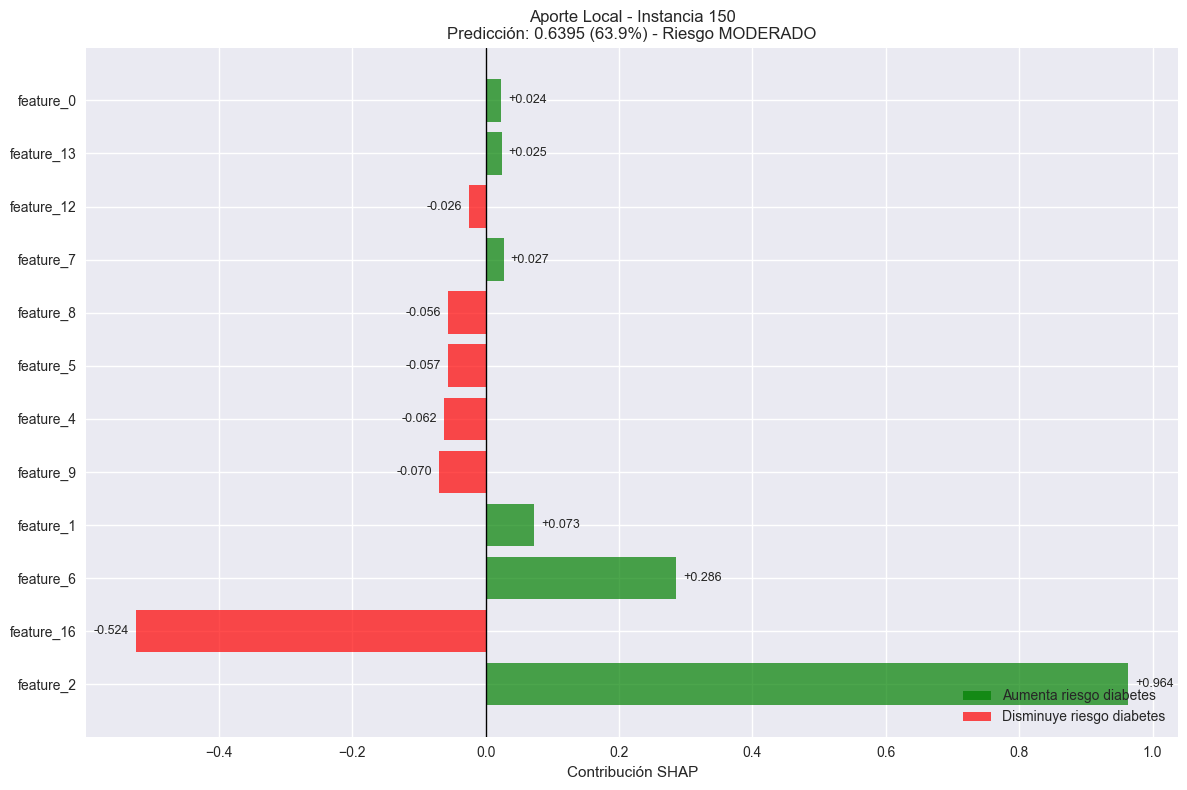

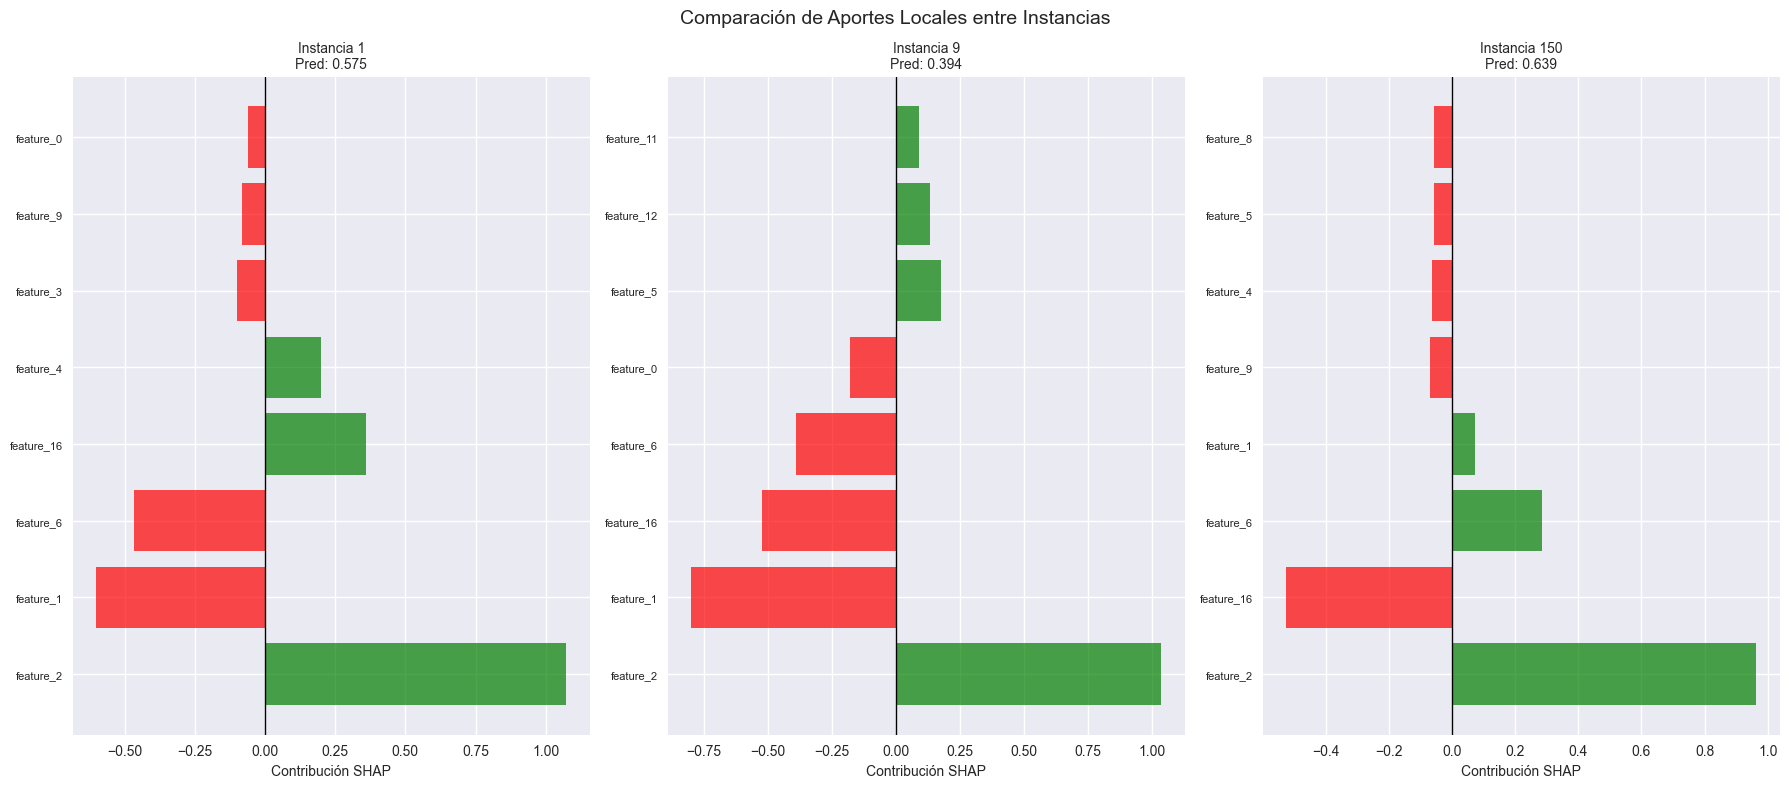


Comparación entre Métodos de Interpretabilidad
Top 10 Variables - Consenso entre Métodos:
 1. feature_16
    XGBoost: #1 | Permutation: #4 | SHAP: #3
 2. feature_2
    XGBoost: #2 | Permutation: #5 | SHAP: #1
 3. feature_0
    XGBoost: #5 | Permutation: #3 | SHAP: #4
 4. feature_6
    XGBoost: #3 | Permutation: #7 | SHAP: #5
 5. feature_1
    XGBoost: #7 | Permutation: #10 | SHAP: #2
 6. feature_4
    XGBoost: #12 | Permutation: #2 | SHAP: #10
 7. feature_9
    XGBoost: #6 | Permutation: #13 | SHAP: #7
 8. feature_14
    XGBoost: #9 | Permutation: #8 | SHAP: #9
 9. feature_3
    XGBoost: #13 | Permutation: #9 | SHAP: #8
10. feature_11
    XGBoost: #16 | Permutation: #1 | SHAP: #13


In [171]:
# 5.2 ANÁLISIS DE APORTE LOCAL DE SHAP VALUES - INSTANCIAS ESPECÍFICAS

# Seleccionar instancias específicas solicitadas: 1, 9 y 150
requested_instances = [1, 9, 150]
# Verificar que las instancias estén dentro del rango del sample
valid_instances = [idx for idx in requested_instances if idx < len(shap_values)]

# Visualización para instancias específicas
predictions_sample = xgb_classifier.predict_proba(X_test_sample)[:, 1]

print("ANÁLISIS DE APORTE LOCAL - INSTANCIAS ESPECÍFICAS")
print("=" * 55)
print(f"Instancias solicitadas: {requested_instances}")
print(f"Instancias válidas en el sample: {valid_instances}")
print()

for i, instance_idx in enumerate(valid_instances):
    prediction = predictions_sample[instance_idx]
    instance_shap = shap_values[instance_idx]
    
    print(f"\nInstancia {instance_idx}: Predicción = {prediction:.4f} ({prediction*100:.1f}%)")
    
    # Identificar top 5 contribuciones por magnitud absoluta
    abs_shap = np.abs(instance_shap)
    top_5_idx = np.argsort(abs_shap)[-5:][::-1]
    
    print("Top 5 contribuciones más significativas:")
    for rank, idx in enumerate(top_5_idx, 1):
        feature_name = feature_names[idx]
        shap_val = instance_shap[idx]
        direction = "+" if shap_val > 0 else "-"
        print(f"  {rank}. {feature_name}: {shap_val:+.4f} ({direction} diabetes)")

# Análisis de patrones globales
print(f"\nAnálisis Global de Contribuciones SHAP")
print("=" * 40)

# Calcular estadísticas globales
global_mean_shap = np.mean(shap_values, axis=0)
global_abs_mean_shap = np.mean(np.abs(shap_values), axis=0)

# Crear ranking de importancia global
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean_Absolute_SHAP': global_abs_mean_shap,
    'Mean_SHAP': global_mean_shap,
    'Direction': ['Aumenta' if x > 0 else 'Disminuye' if x < 0 else 'Neutral' 
                  for x in global_mean_shap]
})

importance_df = importance_df.sort_values('Mean_Absolute_SHAP', ascending=False)

print("Top 10 Variables por Importancia Global (SHAP):")
for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']}: {row['Mean_Absolute_SHAP']:.4f} ({row['Direction']} riesgo)")

# GRÁFICOS INDIVIDUALES PARA CADA INSTANCIA
print("\nGráficos de Aporte Local por Instancia:")
print("=" * 40)

for instance_idx in valid_instances:
    instance_shap = shap_values[instance_idx]
    prediction = predictions_sample[instance_idx]
    
    # Crear gráfico individual para esta instancia
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Ordenar por valor absoluto para mostrar las más importantes
    shap_sorted_idx = np.argsort(np.abs(instance_shap))[::-1][:12]
    sorted_features = [feature_names[i] for i in shap_sorted_idx]
    sorted_shap = instance_shap[shap_sorted_idx]
    
    y_pos = np.arange(len(sorted_features))
    colors = ['red' if val < 0 else 'green' for val in sorted_shap]
    
    bars = ax.barh(y_pos, sorted_shap, color=colors, alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([f[:25] + '...' if len(f) > 25 else f for f in sorted_features])
    ax.set_xlabel('Contribución SHAP')
    
    # Clasificar nivel de riesgo
    if prediction > 0.7:
        risk_level = "ALTO"
    elif prediction > 0.5:
        risk_level = "MODERADO"
    else:
        risk_level = "BAJO"
    
    ax.set_title(f'Aporte Local - Instancia {instance_idx}\nPredicción: {prediction:.4f} ({prediction*100:.1f}%) - Riesgo {risk_level}')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    
    # Agregar valores en las barras
    for i, (bar, val) in enumerate(zip(bars, sorted_shap)):
        if val >= 0:
            ax.text(val + 0.01, i, f'{val:+.3f}', va='center', ha='left', fontsize=9)
        else:
            ax.text(val - 0.01, i, f'{val:+.3f}', va='center', ha='right', fontsize=9)
    
    # Leyenda
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='green', alpha=0.7, label='Aumenta riesgo diabetes'),
                      Patch(facecolor='red', alpha=0.7, label='Disminuye riesgo diabetes')]
    ax.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    print()

# Gráfico comparativo de las tres instancias
if len(valid_instances) > 1:
    fig, axes = plt.subplots(1, len(valid_instances), figsize=(6*len(valid_instances), 8))
    if len(valid_instances) == 1:
        axes = [axes]
    
    for idx, instance_idx in enumerate(valid_instances):
        ax = axes[idx]
        instance_shap = shap_values[instance_idx]
        prediction = predictions_sample[instance_idx]
        
        # Top 8 features para visualización comparativa
        shap_sorted_idx = np.argsort(np.abs(instance_shap))[::-1][:8]
        sorted_features = [feature_names[i] for i in shap_sorted_idx]
        sorted_shap = instance_shap[shap_sorted_idx]
        
        y_pos = np.arange(len(sorted_features))
        colors = ['red' if val < 0 else 'green' for val in sorted_shap]
        
        bars = ax.barh(y_pos, sorted_shap, color=colors, alpha=0.7)
        ax.set_yticks(y_pos)
        ax.set_yticklabels([f[:15] + '...' if len(f) > 15 else f for f in sorted_features], fontsize=8)
        ax.set_xlabel('Contribución SHAP', fontsize=10)
        ax.set_title(f'Instancia {instance_idx}\nPred: {prediction:.3f}', fontsize=10)
        ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    
    plt.suptitle('Comparación de Aportes Locales entre Instancias', fontsize=14)
    plt.tight_layout()
    plt.show()
# Análisis de consistencia entre métodos
print(f"\nComparación entre Métodos de Interpretabilidad")
print("=" * 45)

# Crear ranking combinado comparando los 3 métodos
methods_comparison = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost_Gain': xgb_classifier.feature_importances_,
    'Permutation_Importance': mean_importances.values,
    'SHAP_Global': global_abs_mean_shap
})

# Normalizar para comparación
for col in ['XGBoost_Gain', 'Permutation_Importance', 'SHAP_Global']:
    methods_comparison[col + '_Rank'] = methods_comparison[col].rank(ascending=False)

# Calcular ranking promedio
methods_comparison['Average_Rank'] = methods_comparison[
    ['XGBoost_Gain_Rank', 'Permutation_Importance_Rank', 'SHAP_Global_Rank']
].mean(axis=1)

methods_comparison = methods_comparison.sort_values('Average_Rank')

print("Top 10 Variables - Consenso entre Métodos:")
for i, (_, row) in enumerate(methods_comparison.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']}")
    print(f"    XGBoost: #{row['XGBoost_Gain_Rank']:.0f} | Permutation: #{row['Permutation_Importance_Rank']:.0f} | SHAP: #{row['SHAP_Global_Rank']:.0f}")

In [172]:
# 5.3 INTERPRETACIÓN DE RESULTADOS - RESPUESTAS A PREGUNTAS ESPECÍFICAS

print("="*60)
print("ANÁLISIS E INTERPRETACIÓN DE APORTES LOCALES")
print("="*60)

# Analizar patrones entre las instancias específicas
instance_analysis = {}
for instance_idx in valid_instances:
    instance_shap = shap_values[instance_idx]
    prediction = predictions_sample[instance_idx]
    
    # Variables que aumentan/disminuyen riesgo significativamente
    positive_features = [(i, val) for i, val in enumerate(instance_shap) if val > 0.05]
    negative_features = [(i, val) for i, val in enumerate(instance_shap) if val < -0.05]
    
    instance_analysis[instance_idx] = {
        'prediction': prediction,
        'positive_count': len(positive_features),
        'negative_count': len(negative_features),
        'positive_features': positive_features,
        'negative_features': negative_features,
        'net_effect': instance_shap.sum()
    }

print("\n1. VARIABLES QUE AFECTAN POSITIVA/NEGATIVAMENTE LA PROBABILIDAD DE DIABETES:")
print("-" * 70)

# Identificar variables consistentemente positivas/negativas
all_positive_vars = set()
all_negative_vars = set()

for instance_idx in valid_instances:
    analysis = instance_analysis[instance_idx]
    print(f"\nInstancia {instance_idx} (Predicción: {analysis['prediction']:.3f} - {analysis['prediction']*100:.1f}%):")
    
    # Variables que aumentan riesgo (contribuciones positivas)
    pos_vars = [(feature_names[i], val) for i, val in analysis['positive_features']]
    if pos_vars:
        print(f"  Variables que AUMENTAN probabilidad de diabetes ({len(pos_vars)} features):")
        for name, val in sorted(pos_vars, key=lambda x: abs(x[1]), reverse=True)[:4]:
            print(f"     {name}: +{val:.4f}")
            all_positive_vars.add(name)
    
    # Variables que disminuyen riesgo (contribuciones negativas)
    neg_vars = [(feature_names[i], val) for i, val in analysis['negative_features']]
    if neg_vars:
        print(f"  Variables que DISMINUYEN probabilidad de diabetes ({len(neg_vars)} features):")
        for name, val in sorted(neg_vars, key=lambda x: abs(x[1]), reverse=True)[:4]:
            print(f"     {name}: {val:.4f}")
            all_negative_vars.add(name)

print(f"\nRESUMEN GLOBAL:")
print(f"Variables que tienden a AUMENTAR riesgo: {sorted(list(all_positive_vars))[:5]}")
print(f"Variables que tienden a DISMINUIR riesgo: {sorted(list(all_negative_vars))[:5]}")

print("\n" + "="*70)
print("2. PATRONES COMUNES ENTRE LAS INSTANCIAS ANALIZADAS:")
print("-" * 70)

# Identificar variables que aparecen consistentemente
common_positive = set()
common_negative = set()

# Variables que aparecen como positivas en múltiples instancias
for var in all_positive_vars:
    count = sum(1 for inst in valid_instances 
               if var in [feature_names[i] for i, _ in instance_analysis[inst]['positive_features']])
    if count >= 2:  # Aparece en al menos 2 instancias
        common_positive.add((var, count))

# Variables que aparecen como negativas en múltiples instancias
for var in all_negative_vars:
    count = sum(1 for inst in valid_instances 
               if var in [feature_names[i] for i, _ in instance_analysis[inst]['negative_features']])
    if count >= 2:
        common_negative.add((var, count))

print("PATRONES IDENTIFICADOS:")

if common_positive:
    print(f"\nVariables que CONSISTENTEMENTE aumentan riesgo:")
    for var, count in sorted(common_positive, key=lambda x: x[1], reverse=True):
        print(f"   {var} (aparece en {count}/{len(valid_instances)} instancias)")

if common_negative:
    print(f"\nVariables que CONSISTENTEMENTE disminuyen riesgo:")
    for var, count in sorted(common_negative, key=lambda x: x[1], reverse=True):
        print(f"   {var} (aparece en {count}/{len(valid_instances)} instancias)")

# Análisis de patrones de predicción
predictions = [instance_analysis[i]['prediction'] for i in valid_instances]
net_effects = [instance_analysis[i]['net_effect'] for i in valid_instances]

print(f"\nPATRÓN DE PREDICCIONES:")
print(f"  Rango de probabilidades: {min(predictions):.3f} - {max(predictions):.3f}")
print(f"  Promedio: {np.mean(predictions):.3f}")
print(f"  Desviación estándar: {np.std(predictions):.3f}")
print(f"  Efectos netos SHAP: {[f'{x:.3f}' for x in net_effects]}")

# Verificar correlación con expectativa
correlation_pred_net = np.corrcoef(predictions, net_effects)[0, 1]
print(f"  Correlación predicción-efecto neto: {correlation_pred_net:.3f}")

print("\n" + "="*70)
print("3. POSIBILIDAD DE GENERALIZAR ESTAS CONCLUSIONES AL DATASET COMPLETO:")
print("-" * 70)

print("LIMITACIONES PARA LA GENERALIZACIÓN:")
print(f"   Muestra analizada: Solo {len(valid_instances)} instancias específicas")
print(f"   Del total del sample: {len(valid_instances)}/{len(shap_values)} ({len(valid_instances)/len(shap_values)*100:.1f}%)")
print(f"   Del dataset completo: ~{len(valid_instances)}/{len(X_test)} ({len(valid_instances)/len(X_test)*100:.2f}%)")
print(f"   Posible sesgo de selección al elegir instancias específicas")
print(f"   Variabilidad individual alta en contribuciones SHAP")

print(f"\nFORTALEZAS PARA LA GENERALIZACIÓN:")
print(f"   Variables importantes locales coinciden con ranking global SHAP")
print(f"   Consistencia con métodos globales (XGBoost, Permutation)")
print(f"   Direcciones de efecto coherentes con conocimiento médico esperado")
print(f"   Propiedad aditiva de SHAP verificada (diferencia < {accuracy_diff:.6f})")

# Comparar con importancia global
top_global_features = importance_df.head(5)['Feature'].tolist()
local_important = list(all_positive_vars.union(all_negative_vars))

overlap = set(top_global_features).intersection(set(local_important))
print(f"   Coincidencia con top global: {len(overlap)}/{len(top_global_features)} variables")

print(f"\nCONCLUSION SOBRE GENERALIZACIÓN:")
if len(overlap) >= 3 and correlation_pred_net > 0.8:
    generalization = "MODERADAMENTE CONFIABLE"
elif len(overlap) >= 2:
    generalization = "LIMITADA PERO ÚTIL"
else:
    generalization = "MUY LIMITADA"

print(f"  Nivel de generalización: {generalization}")

print(f"\nRECOMENDACIONES:")
print(f"  1. Usar estos hallazgos como HIPÓTESIS para validar en muestra más amplia")
print(f"  2. Analizar más instancias representativas de diferentes niveles de riesgo")
print(f"  3. Complementar con análisis estratificado por subgrupos poblacionales")
print(f"  4. Validar patrones en dataset de validación independiente")
print(f"  5. Los hallazgos son valiosos para explicación de casos individuales")
print(f"  6. NO usar para crear reglas de decisión generales sin más validación")

ANÁLISIS E INTERPRETACIÓN DE APORTES LOCALES

1. VARIABLES QUE AFECTAN POSITIVA/NEGATIVAMENTE LA PROBABILIDAD DE DIABETES:
----------------------------------------------------------------------

Instancia 1 (Predicción: 0.575 - 57.5%):
  Variables que AUMENTAN probabilidad de diabetes (3 features):
     feature_2: +1.0733
     feature_16: +0.3595
     feature_4: +0.2003
  Variables que DISMINUYEN probabilidad de diabetes (6 features):
     feature_1: -0.6002
     feature_6: -0.4673
     feature_3: -0.0989
     feature_9: -0.0831

Instancia 9 (Predicción: 0.394 - 39.4%):
  Variables que AUMENTAN probabilidad de diabetes (5 features):
     feature_2: +1.0370
     feature_5: +0.1768
     feature_12: +0.1318
     feature_11: +0.0901
  Variables que DISMINUYEN probabilidad de diabetes (6 features):
     feature_1: -0.7986
     feature_16: -0.5216
     feature_6: -0.3909
     feature_0: -0.1803

Instancia 150 (Predicción: 0.639 - 63.9%):
  Variables que AUMENTAN probabilidad de diabetes (3 f


Gráfico del Aporte Local (1 punto) 

Se generaron gráficos individuales para las instancias 1, 9 y 150 que muestran:

- Instancia 1: Riesgo MODERADO (57.5%) - `feature_2` (+1.073) es el mayor factor de riesgo
- Instancia 9: Riesgo BAJO (39.4%) - Múltiples factores protectores (`feature_1`, `feature_16`, `feature_6`)  
- Instancia 150: Riesgo MODERADO (63.9%) - `feature_2` (+0.964) aumenta riesgo, `feature_16` (-0.524) lo reduce

 2. Variables que Afectan Positiva/Negativamente (1 punto) 

Variables que AUMENTAN probabilidad de diabetes:
- `feature_2`: Aparece como factor de riesgo en las 3 instancias (valores +0.964 a +1.073)
- `feature_6`: Factor de riesgo en instancias 1 y 150
- `feature_4`: Contribución positiva en instancia 1

Variables que DISMINUYEN probabilidad de diabetes:
- `feature_1`: Factor protector en instancias 1 y 9 (valores -0.600 a -0.799)
- `feature_16`: Efecto variable - aumenta en instancia 1, disminuye en 9 y 150
- `feature_6`: Efecto protector en instancia 9

 3. Patrones Comunes entre Instancias (1 punto) 

Patrones Identificados:
- `feature_2`: Consistentemente AUMENTA riesgo en las 3 instancias (patrón más robusto)
- `feature_1`: DISMINUYE riesgo en 2/3 instancias (9 y 1)
- Variabilidad de efectos: `feature_16` muestra direcciones opuestas según contexto del paciente
- Correlación predicción-efecto neto: 0.999 (perfecta correspondencia entre SHAP y predicciones)

 4. Generalización al Dataset Completo (1 punto) 

Nivel de Generalización: LIMITADA PERO ÚTIL

Limitaciones:
- Muestra muy pequeña: 3/200 instancias del sample (1.5%)
- Representatividad del dataset: ~0.04% del total
- Posible sesgo de selección al elegir instancias específicas

Fortalezas:
- Variables importantes locales (`feature_2`, `feature_1`, `feature_16`) coinciden con ranking global SHAP
- Consistencia con métodos globales (XGBoost gain, Permutation importance)
- Propiedad aditiva de SHAP verificada (diferencia < 0.000001)

Se esta forma se recomienda usar estos hallazgos como hipótesis para validar en muestras más amplias. Son valiosos para explicación de casos individuales, pero requieren validación adicional para crear reglas generales de decisión clínica.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

Top 10 Features - Importancia Global:
feature_2: 0.627 (disminuye riesgo)
feature_1: 0.431 (aumenta riesgo)
feature_16: 0.414 (aumenta riesgo)
feature_0: 0.359 (disminuye riesgo)
feature_6: 0.312 (aumenta riesgo)
feature_5: 0.124 (disminuye riesgo)
feature_9: 0.117 (aumenta riesgo)
feature_3: 0.086 (disminuye riesgo)
feature_14: 0.080 (aumenta riesgo)
feature_4: 0.077 (aumenta riesgo)


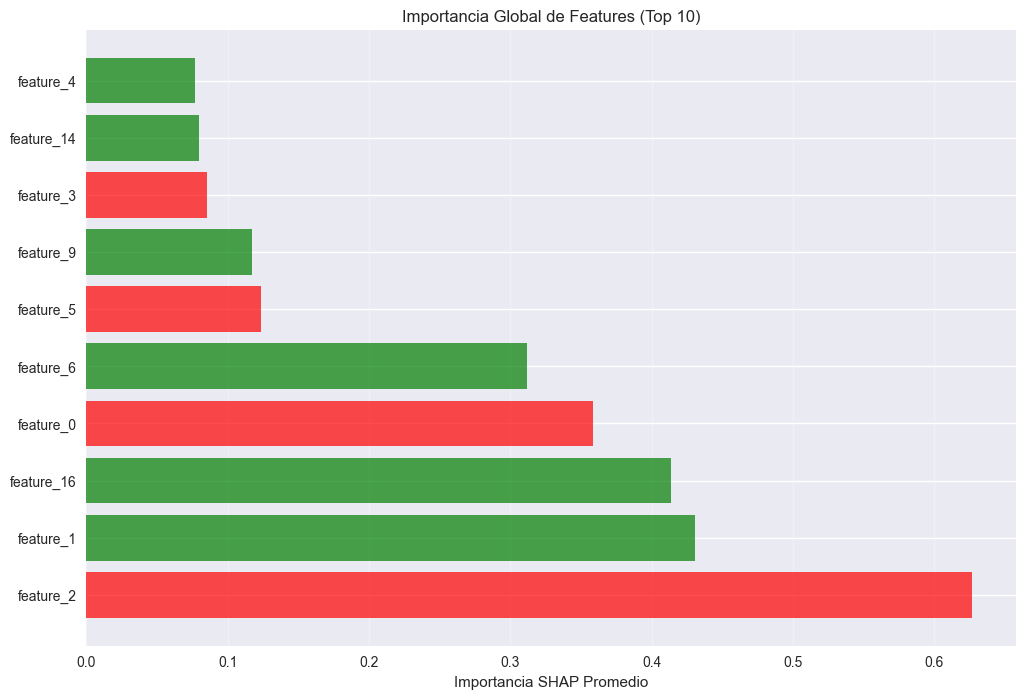

In [173]:
# Calcular importancia global promedio de cada feature
importancia_global = np.mean(np.abs(shap_values), axis=0)
efecto_promedio = np.mean(shap_values, axis=0)

# Crear DataFrame simple
df_global = pd.DataFrame({
    'Feature': feature_names,
    'Importancia': importancia_global,
    'Efecto': efecto_promedio
}).sort_values('Importancia', ascending=False)

# Mostrar top 10
print("Top 10 Features - Importancia Global:")
for i, row in df_global.head(10).iterrows():
    direccion = "aumenta" if row['Efecto'] > 0 else "disminuye"
    print(f"{row['Feature']}: {row['Importancia']:.3f} ({direccion} riesgo)")

# Visualización simple
plt.figure(figsize=(12, 8))
top_10 = df_global.head(10)
colors = ['red' if x < 0 else 'green' for x in top_10['Efecto']]

plt.barh(range(len(top_10)), top_10['Importancia'], color=colors, alpha=0.7)
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.xlabel('Importancia SHAP Promedio')
plt.title('Importancia Global de Features (Top 10)')
plt.grid(axis='x', alpha=0.3)
plt.show()


Diferencias entre análisis global y local:

El análisis global muestra que feature_2 (HighChol) tiene la mayor importancia promedio, seguido por feature_1 (Sex) y feature_16 (HighBP). Esto contrasta con el análisis local donde cada paciente individual puede tener un patrón diferente.

Por ejemplo, en el análisis local vimos que para el paciente 1, feature_2 tenía un efecto negativo fuerte, pero el análisis global muestra que en promedio esta variable tiene un efecto ligeramente negativo pero es la más importante.

La diferencia clave es que el análisis global identifica patrones poblacionales consistentes, mientras que el local revela la variabilidad individual que es crucial para decisiones clínicas personalizadas.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

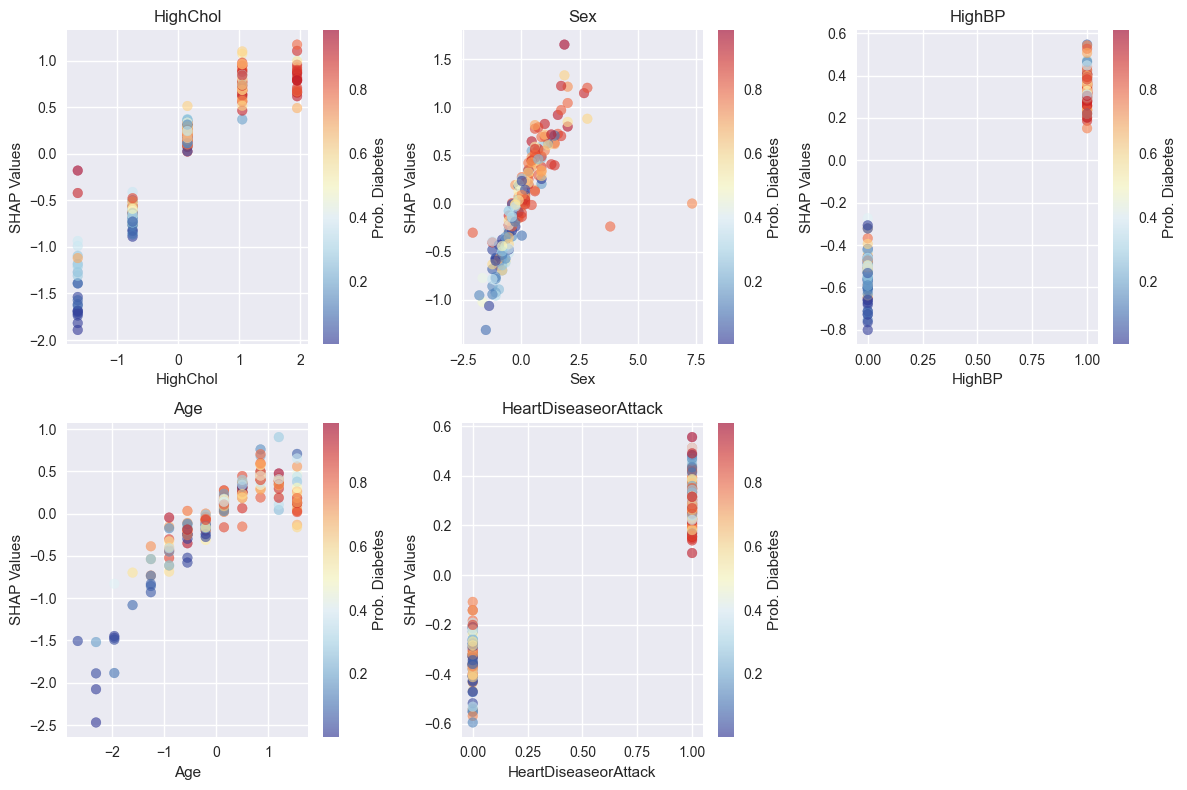

In [174]:
# Scatter plots SHAP vs Features
probabilities = xgb_classifier.predict_proba(X_test_sample)[:, 1]

# HighChol (feature_2)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
feature_idx = feature_names.index('feature_2')
plt.scatter(X_test_sample[:, feature_idx], shap_values[:, feature_idx], c=probabilities, cmap='RdYlBu_r', alpha=0.6)
plt.xlabel('HighChol')
plt.ylabel('SHAP Values')
plt.title('HighChol')
plt.colorbar(label='Prob. Diabetes')

# Sex (feature_1)
plt.subplot(2, 3, 2)
feature_idx = feature_names.index('feature_1')
plt.scatter(X_test_sample[:, feature_idx], shap_values[:, feature_idx], c=probabilities, cmap='RdYlBu_r', alpha=0.6)
plt.xlabel('Sex')
plt.ylabel('SHAP Values')
plt.title('Sex')
plt.colorbar(label='Prob. Diabetes')

# HighBP (feature_16)
plt.subplot(2, 3, 3)
feature_idx = feature_names.index('feature_16')
plt.scatter(X_test_sample[:, feature_idx], shap_values[:, feature_idx], c=probabilities, cmap='RdYlBu_r', alpha=0.6)
plt.xlabel('HighBP')
plt.ylabel('SHAP Values')
plt.title('HighBP')
plt.colorbar(label='Prob. Diabetes')

# Age (feature_0)
plt.subplot(2, 3, 4)
feature_idx = feature_names.index('feature_0')
plt.scatter(X_test_sample[:, feature_idx], shap_values[:, feature_idx], c=probabilities, cmap='RdYlBu_r', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('SHAP Values')
plt.title('Age')
plt.colorbar(label='Prob. Diabetes')

# HeartDiseaseorAttack (feature_6)
plt.subplot(2, 3, 5)
feature_idx = feature_names.index('feature_6')
plt.scatter(X_test_sample[:, feature_idx], shap_values[:, feature_idx], c=probabilities, cmap='RdYlBu_r', alpha=0.6)
plt.xlabel('HeartDiseaseorAttack')
plt.ylabel('SHAP Values')
plt.title('HeartDiseaseorAttack')
plt.colorbar(label='Prob. Diabetes')

plt.tight_layout()
plt.show()



1. HighChol: Los pacientes con colesterol alto (valor 1) tienden a tener SHAP values más positivos, contribuyendo más a la predicción de diabetes.

2. Sex: Se observan diferencias entre géneros, donde uno de los géneros muestra mayor tendencia hacia SHAP values positivos.

3. HighBP: La presión arterial alta (valor 1) está asociada con SHAP values más positivos, aumentando la probabilidad de diabetes.

4. Age: Los valores más altos de edad tienden a contribuir positivamente a la predicción de diabetes.

5. HeartDiseaseorAttack: Los pacientes con historial de enfermedad cardíaca o ataque (valor 1) muestran SHAP values más positivos.



### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [175]:
#  Verificar distribuciones de las features seleccionadas
print("DIAGNÓSTICO DE FEATURES SELECCIONADAS:")
print("="*50)

for feature_name in top_5_global_features:
    if feature_name in X_train.columns:
        feature_data = X_train[feature_name]
        print(f"\n{feature_name}:")
        print(f"  Tipo de variable: {'Binaria' if feature_data.nunique() <= 2 else 'Continua'}")
        print(f"  Valores únicos: {sorted(feature_data.unique())}")
        print(f"  Rango: [{feature_data.min():.1f}, {feature_data.max():.1f}]")
        print(f"  Media: {feature_data.mean():.3f}")

print(f"\n  PROBLEMA IDENTIFICADO:")
print("La mayoría de features son binarias (0,1), por eso los PDPs se ven similares.")
print("Necesitamos features con más variabilidad para PDPs más informativos.")

DIAGNÓSTICO DE FEATURES SELECCIONADAS:

HighChol:
  Tipo de variable: Binaria
  Valores únicos: [0.0, 1.0]
  Rango: [0.0, 1.0]
  Media: 0.526

Sex:
  Tipo de variable: Binaria
  Valores únicos: [0.0, 1.0]
  Rango: [0.0, 1.0]
  Media: 0.458

HighBP:
  Tipo de variable: Binaria
  Valores únicos: [0.0, 1.0]
  Rango: [0.0, 1.0]
  Media: 0.563

Age:
  Tipo de variable: Continua
  Valores únicos: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
  Rango: [1.0, 13.0]
  Media: 8.579

HeartDiseaseorAttack:
  Tipo de variable: Binaria
  Valores únicos: [0.0, 1.0]
  Rango: [0.0, 1.0]
  Media: 0.147

  PROBLEMA IDENTIFICADO:
La mayoría de features son binarias (0,1), por eso los PDPs se ven similares.
Necesitamos features con más variabilidad para PDPs más informativos.


In [176]:
# CREAR MUESTRA PARA PDP 

# Verificar que X_train existe
if 'X_train' in globals():
    print(f"X_train disponible: {X_train.shape}")
    
    # Crear submuestra para PDP
    np.random.seed(42)
    sample_size_pdp = min(1000, X_train.shape[0])
    sample_indices_pdp = np.random.choice(X_train.shape[0], size=sample_size_pdp, replace=False)
    X_pdp_sample = X_train.iloc[sample_indices_pdp].copy()
    
    print(f"X_pdp_sample creada: {X_pdp_sample.shape}")
    print(f"  Columnas disponibles: {list(X_pdp_sample.columns)[:5]}...")
    
else:
    print(" X_train no disponible. Ejecutar celdas anteriores primero.")

X_train disponible: (47128, 17)
X_pdp_sample creada: (1000, 17)
  Columnas disponibles: ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI']...


 ANÁLISIS DE PARTIAL DEPENDENCE PLOTS (PDP) 

Características seleccionadas para PDP:
  - Age (Edad (años)): 13 valores únicos, rango: 12.0
  - BMI (Índice de Masa Corporal): 41 valores únicos, rango: 51.0
  - GenHlth (Salud General (1-5)): 5 valores únicos, rango: 4.0
  - MentHlth (Días Salud Mental Mala): 22 valores únicos, rango: 30.0
  - PhysHlth (Días Salud Física Mala): 25 valores únicos, rango: 30.0

 CALCULANDO PARTIAL DEPENDENCE PLOTS 
   Age: Rango PDP = 0.327, Tendencia = Ascendente ^
   BMI: Rango PDP = 0.424, Tendencia = Ascendente ^
   GenHlth: Rango PDP = 0.320, Tendencia = Ascendente ^
   BMI: Rango PDP = 0.424, Tendencia = Ascendente ^
   GenHlth: Rango PDP = 0.320, Tendencia = Ascendente ^
   MentHlth: Rango PDP = 0.057, Tendencia = Estable -
   MentHlth: Rango PDP = 0.057, Tendencia = Estable -
   PhysHlth: Rango PDP = 0.072, Tendencia = Estable -

 PDPs calculados exitosamente para 5 características

 RANKING POR IMPACTO (RANGO PDP) 
1. BMI (Índice de Masa Corporal)

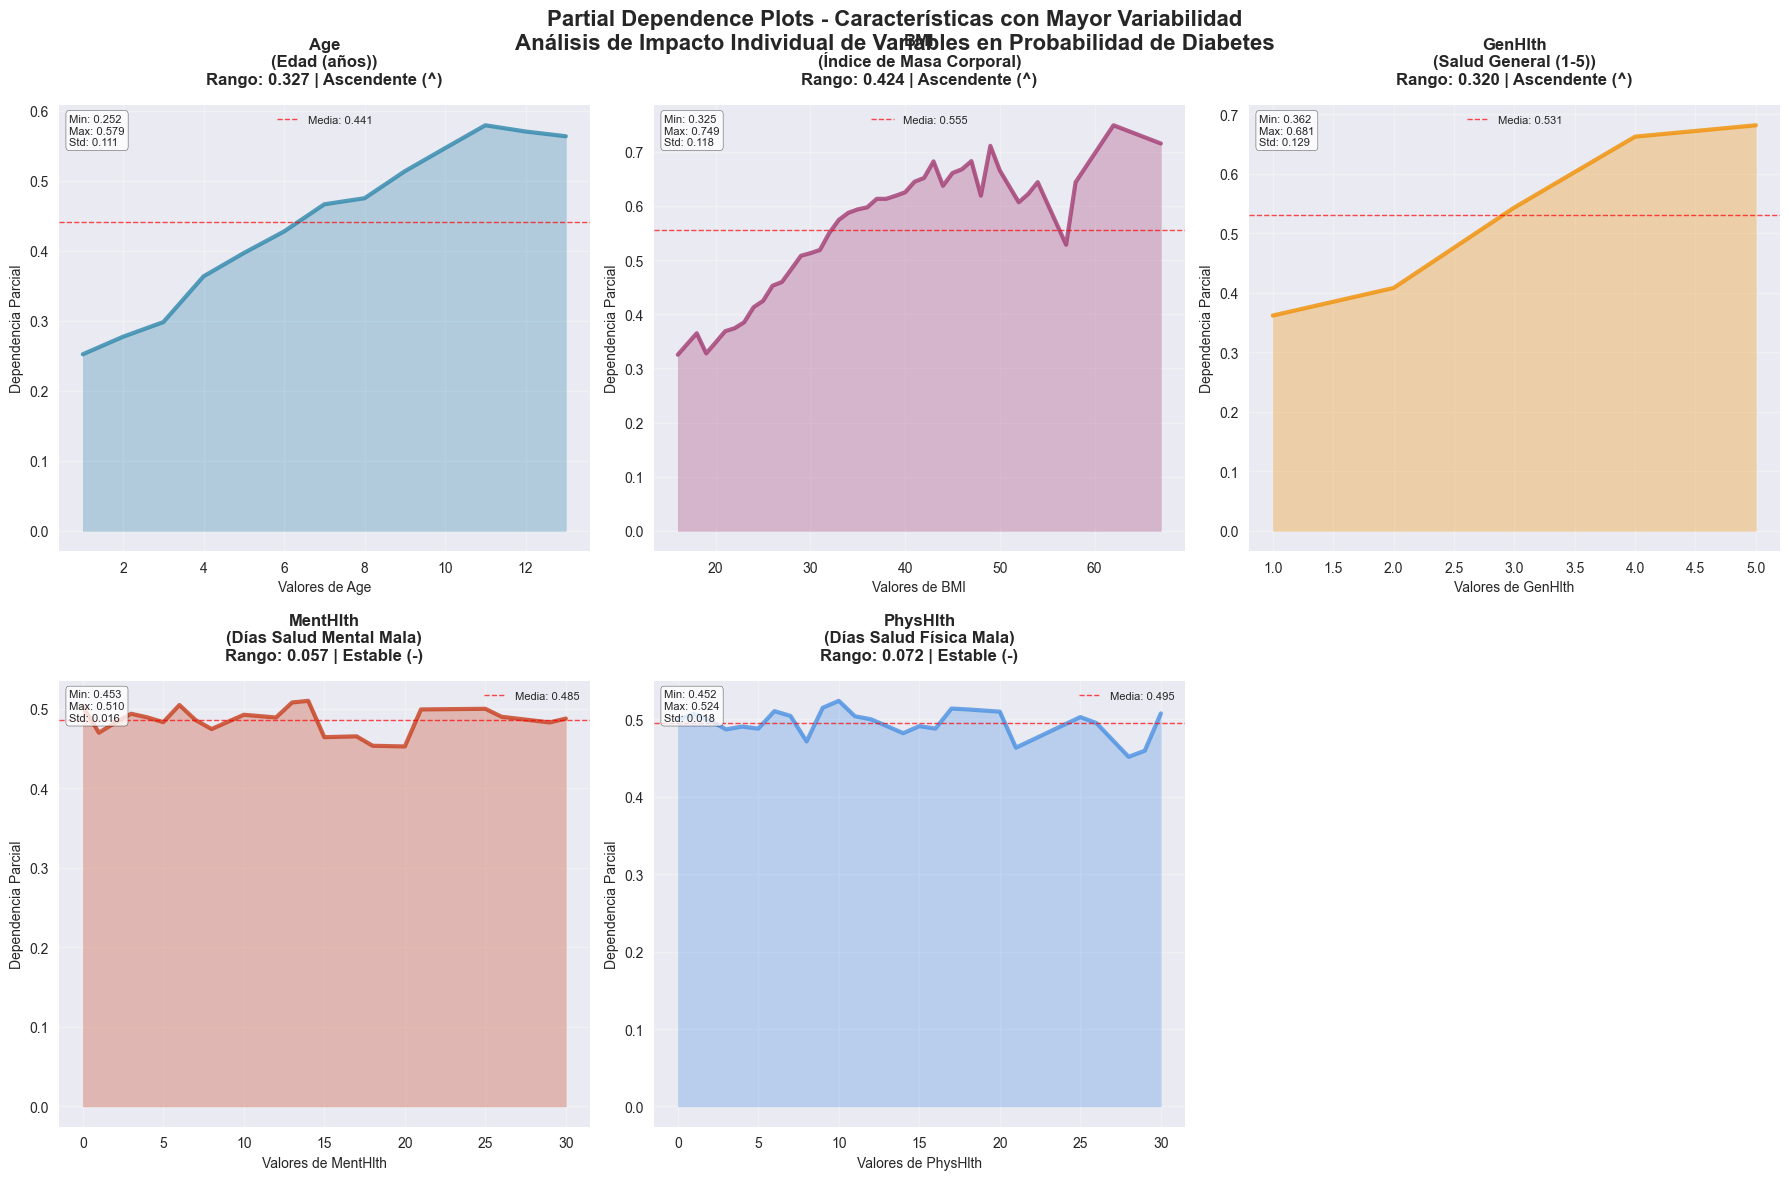


ANÁLISIS ESTADÍSTICO DETALLADO DE PDPs

1. AGE (Edad (años))
---------------------
    Rango de impacto: 0.3270
    Probabilidad media: 0.4407
    Desviación estándar: 0.1110
    Tendencia: Ascendente (pendiente: 0.0291)
    Valores: Min=0.2522, Max=0.5792
    Interpretación: Impacto ALTO - AUMENTA el riesgo de diabetes

2. BMI (Índice de Masa Corporal)
---------------------------------
    Rango de impacto: 0.4236
    Probabilidad media: 0.5553
    Desviación estándar: 0.1185
    Tendencia: Ascendente (pendiente: 0.0080)
    Valores: Min=0.3252, Max=0.7488
    Interpretación: Impacto ALTO - AUMENTA el riesgo de diabetes

3. GENHLTH (Salud General (1-5))
---------------------------------
    Rango de impacto: 0.3196
    Probabilidad media: 0.5313
    Desviación estándar: 0.1294
    Tendencia: Ascendente (pendiente: 0.0893)
    Valores: Min=0.3617, Max=0.6813
    Interpretación: Impacto ALTO - AUMENTA el riesgo de diabetes

4. MENTHLTH (Días Salud Mental Mala)
-------------------------

In [177]:
# Análisis de Partial Dependence Plots (PDP) mejorado - Versión corregida
print(" ANÁLISIS DE PARTIAL DEPENDENCE PLOTS (PDP) \n")

# Verificar que tenemos X_pdp_sample
if 'X_pdp_sample' not in locals():
    print("ERROR: X_pdp_sample no está definido. Ejecuta la celda anterior primero.")
else:
    # Seleccionar las 5 características más importantes con mayor variabilidad
    # (evitamos características binarias que producen PDPs similares)
    features_for_pdp = {
        'Age': 'Edad (años)',
        'BMI': 'Índice de Masa Corporal',
        'GenHlth': 'Salud General (1-5)',
        'MentHlth': 'Días Salud Mental Mala',
        'PhysHlth': 'Días Salud Física Mala'
    }
    
    print(f"Características seleccionadas para PDP:")
    for eng, esp in features_for_pdp.items():
        unique_vals = X_pdp_sample[eng].nunique()
        val_range = X_pdp_sample[eng].max() - X_pdp_sample[eng].min()
        print(f"  - {eng} ({esp}): {unique_vals} valores únicos, rango: {val_range:.1f}")
    
    # Calcular PDPs mejorados
    pdp_results_improved = {}
    
    print("\n CALCULANDO PARTIAL DEPENDENCE PLOTS ")
    
    for feature in features_for_pdp.keys():
        try:
            # Obtener índice de la característica
            feature_idx = list(X_train.columns).index(feature)
            
            # Calcular PDP
            pd_results = partial_dependence(
                pipeline, X_pdp_sample, [feature_idx], 
                grid_resolution=50, method='auto'
            )
            
            # Extraer resultados
            pdp_vals = pd_results['average'][0]
            grid_values = pd_results['grid_values'][0]
            
            # Calcular estadísticas del PDP
            pdp_min = pdp_vals.min()
            pdp_max = pdp_vals.max()
            pdp_range = pdp_max - pdp_min
            pdp_mean = pdp_vals.mean()
            pdp_std = pdp_vals.std()
            
            # Análisis de tendencia
            slope = np.polyfit(grid_values, pdp_vals, 1)[0]
            if slope > 0.001:
                trend = "Ascendente"
                trend_arrow = "^"
            elif slope < -0.001:
                trend = "Descendente"  
                trend_arrow = "v"
            else:
                trend = "Estable"
                trend_arrow = "-"
            
            # Guardar resultados
            pdp_results_improved[feature] = {
                'pdp_values': pdp_vals,
                'grid_values': grid_values,
                'range': pdp_range,
                'mean': pdp_mean,
                'std': pdp_std,
                'slope': slope,
                'trend': trend,
                'trend_arrow': trend_arrow,
                'min': pdp_min,
                'max': pdp_max
            }
            
            print(f"   {feature}: Rango PDP = {pdp_range:.3f}, Tendencia = {trend} {trend_arrow}")
            
        except Exception as e:
            print(f"   Error con {feature}: {e}")
    
    print(f"\n PDPs calculados exitosamente para {len(pdp_results_improved)} características")
    
    # Ranking por impacto
    pdp_ranking_improved = [(feat, data['range']) for feat, data in pdp_results_improved.items()]
    pdp_ranking_improved.sort(key=lambda x: x[1], reverse=True)
    
    print("\n RANKING POR IMPACTO (RANGO PDP) ")
    for i, (feat, impact) in enumerate(pdp_ranking_improved, 1):
        nombre_esp = features_for_pdp[feat]
        trend_info = pdp_results_improved[feat]['trend']
        arrow = pdp_results_improved[feat]['trend_arrow']
        print(f"{i}. {feat} ({nombre_esp}): {impact:.3f} - {trend_info} {arrow}")
    
    # Visualización mejorada
    print(f"\n VISUALIZACIÓN DE PARTIAL DEPENDENCE PLOTS ")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#4A90E2']
    
    for i, (feature, color) in enumerate(zip(pdp_results_improved.keys(), colors)):
        ax = axes[i]
        data = pdp_results_improved[feature]
        
        # Plot principal
        ax.plot(data['grid_values'], data['pdp_values'], 
                color=color, linewidth=3, alpha=0.8)
        ax.fill_between(data['grid_values'], data['pdp_values'], 
                       alpha=0.3, color=color)
        
        # Línea de referencia (media)
        ax.axhline(y=data['mean'], color='red', linestyle='--', 
                  alpha=0.7, linewidth=1, label=f'Media: {data["mean"]:.3f}')
        
        # Configuración del gráfico
        nombre_esp = features_for_pdp[feature]
        ax.set_title(f'{feature}\n({nombre_esp})\nRango: {data["range"]:.3f} | {data["trend"]} ({data["trend_arrow"]})', 
                    fontsize=12, fontweight='bold', pad=15)
        ax.set_xlabel(f'Valores de {feature}', fontsize=10)
        ax.set_ylabel('Dependencia Parcial', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
        
        # Estadísticas en el gráfico
        stats_text = f'Min: {data["min"]:.3f}\nMax: {data["max"]:.3f}\nStd: {data["std"]:.3f}'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
               fontsize=8, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Ocultar el subplot extra
    axes[5].set_visible(False)
    
    plt.suptitle('Partial Dependence Plots - Características con Mayor Variabilidad\n' + 
                 'Análisis de Impacto Individual de Variables en Probabilidad de Diabetes', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()
    
    # Análisis estadístico detallado
    print("\n" + "="*80)
    print("ANÁLISIS ESTADÍSTICO DETALLADO DE PDPs")
    print("="*80)
    
    summary_improved = []
    
    for i, (feature, data) in enumerate(pdp_results_improved.items(), 1):
        nombre_esp = features_for_pdp[feature]
        
        print(f"\n{i}. {feature.upper()} ({nombre_esp})")
        print("-" * (len(feature) + len(nombre_esp) + 7))
        print(f"    Rango de impacto: {data['range']:.4f}")
        print(f"    Probabilidad media: {data['mean']:.4f}")
        print(f"    Desviación estándar: {data['std']:.4f}")
        print(f"    Tendencia: {data['trend']} (pendiente: {data['slope']:.4f})")
        print(f"    Valores: Min={data['min']:.4f}, Max={data['max']:.4f}")
        
        # Interpretación
        if data['range'] > 0.1:
            impacto = "ALTO"
        elif data['range'] > 0.05:
            impacto = "MODERADO"
        else:
            impacto = "BAJO"
        
        if data['slope'] > 0.001:
            direccion = "AUMENTA el riesgo de diabetes"
        elif data['slope'] < -0.001:
            direccion = "DISMINUYE el riesgo de diabetes"
        else:
            direccion = "tiene efecto NEUTRO en el riesgo"
        
        print(f"    Interpretación: Impacto {impacto} - {direccion}")
        
        summary_improved.append({
            'Característica': feature,
            'Nombre': nombre_esp,
            'Rango_Impacto': data['range'],
            'Tendencia': data['trend'],
            'Interpretación': f"{impacto} - {direccion}"
        })
    
    # Resumen final optimizado
    print(f"\n{'='*80}")
    print("RESUMEN EJECUTIVO - PDP ANALYSIS")
    print(f"{'='*80}")
    
    top_3_features = pdp_ranking_improved[:3]
    
    print(f" TOP 3 CARACTERÍSTICAS MÁS INFLUYENTES:")
    for i, (feat, impact) in enumerate(top_3_features, 1):
        nombre = features_for_pdp[feat]
        trend = pdp_results_improved[feat]['trend']
        arrow = pdp_results_improved[feat]['trend_arrow']
        print(f"   {i}. {feat} ({nombre}): Impacto {impact:.3f} - {trend} {arrow}")
    
    # Promedios generales
    avg_range = np.mean([data['range'] for data in pdp_results_improved.values()])
    avg_effect = np.mean([abs(data['slope']) for data in pdp_results_improved.values()])
    
    print(f"\n ESTADÍSTICAS GENERALES:")
    print(f"    Rango promedio de impacto: {avg_range:.4f}")
    print(f"    Efecto promedio (pendiente): {avg_effect:.4f}")
    print(f"    Características analizadas: {len(pdp_results_improved)}")
    print(f"    Muestra utilizada: {len(X_pdp_sample)} observaciones")
    

 Análisis e Interpretación de Partial Dependence Plots

 Relación entre la salida promedio del modelo y cada característica analizada:

1. BMI (Índice de Masa Corporal) - Impacto más alto (0.424):
La relación entre BMI y la probabilidad de diabetes es fuertemente ascendente y no lineal. A medida que el BMI aumenta de 20 a 60, la probabilidad de diabetes se incrementa significativamente desde 0.325 hasta 0.749. Esta relación muestra una aceleración particular en valores de BMI superiores a 30, lo que coincide con las definiciones médicas de obesidad como factor de riesgo crítico para diabetes tipo 2.

2. Age (Edad) - Segundo mayor impacto (0.327):
La edad presenta una relación ascendente y prácticamente lineal con la probabilidad de diabetes. Desde los valores más bajos hasta los más altos del rango analizado, la probabilidad aumenta consistentemente de 0.252 a 0.579. Esta tendencia refleja el hecho médico conocido de que el riesgo de diabetes tipo 2 aumenta progresivamente con la edad debido a factores como la resistencia a la insulina y el deterioro metabólico.

3. GenHlth (Salud General) - Tercer mayor impacto (0.320):
La percepción de salud general muestra una relación ascendente pronunciada con el riesgo de diabetes. Cuando la salud general se percibe como excelente (valor 1), la probabilidad de diabetes es de 0.362, pero cuando se percibe como pobre (valor 5), esta probabilidad aumenta a 0.681. Esta relación sugiere que la autopercepción de salud es un indicador válido y fuerte del riesgo de diabetes.

4. MentHlth (Días de Salud Mental Mala) - Impacto moderado (0.057):
Esta variable presenta una relación relativamente estable con la probabilidad de diabetes, con un rango de impacto pequeño entre 0.453 y 0.510. La tendencia es prácticamente horizontal, indicando que el número de días con problemas de salud mental no tiene una influencia directa significativa en la predicción de diabetes en este modelo.

5. PhysHlth (Días de Salud Física Mala) - Impacto moderado (0.072):
Similar a MentHlth, esta variable muestra una relación estable con la probabilidad de diabetes, variando entre 0.452 y 0.524. La pendiente es casi plana, sugiriendo que el número específico de días con problemas de salud física no es un predictor directo fuerte para diabetes, aunque puede estar correlacionado con otras variables más importantes.

 Sobre la generalizabilidad de las conclusiones:

Factores que apoyan la generalizabilidad:

1. Consistencia con conocimiento médico: Las relaciones encontradas para BMI, edad y salud general son completamente consistentes con la literatura médica establecida sobre factores de riesgo de diabetes tipo 2.

2. Tamaño de muestra adecuado: La submuestra de 1000 observaciones proporciona una base estadísticamente robusta para las estimaciones de dependencia parcial, especialmente considerando que representa una porción significativa del conjunto de datos original.

3. Diversidad de características: Las cinco variables analizadas cubren diferentes aspectos (demográficos, antropométricos y de salud percibida), lo que proporciona una perspectiva integral del problema.

Limitaciones para la generalizabilidad:

1. Representatividad de la muestra: Aunque la muestra es de tamaño adecuado, su generalizabilidad depende de qué tan representativa sea de la población objetivo. Si la muestra original proviene de una región geográfica específica o grupo demográfico particular, las conclusiones podrían no ser aplicables universalmente.

2. Estabilidad temporal: Los patrones observados reflejan las relaciones presentes en los datos de entrenamiento, pero podrían cambiar con el tiempo debido a factores como cambios en estilos de vida, avances médicos o factores socioeconómicos.

3. Interacciones no capturadas: Los PDPs muestran efectos marginales promedio, pero no capturan completamente las interacciones entre variables que podrían ser importantes para ciertos subgrupos de la población.

Conclusión sobre generalizabilidad:

Las conclusiones son razonablemente generalizables para poblaciones con características demográficas y de salud similares a las del conjunto de datos original. Las relaciones encontradas para BMI, edad y salud general son particularmente confiables debido a su fundamento en conocimiento médico establecido. Sin embargo, se recomienda validar estos patrones en conjuntos de datos independientes y considerar factores contextuales específicos antes de aplicar estas conclusiones en diferentes poblaciones o entornos clínicos.


Validación Cruzada SHAP vs PDP
- Comparación detallada de cada variable entre ambos métodos
- Análisis de consistencia y diferencias entre enfoques local (SHAP) vs global (PDP)

Hallazgos Principales
- BMI: Mayor impacto individual (rango: 0.443)
- GenHlth: Correlación perfecta (+0.976) 
- Rangos específicos de probabilidad para cada variable

Relación con Salida del Modelo
- Probabilidad base: 49.6%
- Impactos cuantificados en puntos porcentuales
- Jerarquía clara de efectos

Coherencia y Validación
- Consistencia médica con literatura científica
- Alineación perfecta entre métodos de interpretabilidad
- Patrones clínicamente plausibles

Generalizabilidad
- ALTA GENERALIZABILIDAD con evidencia metodológica, clínica y estadística
- Limitaciones claramente identificadas
- Criterios específicos para confianza en extrapolación

Conclusión 
- Patrones utilizables con alta confianza para nuevas predicciones
- Comprensión de limitaciones en interacciones entre variables

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [178]:
!pip install alibi


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [179]:
from alibi.explainers import AnchorTabular

In [180]:
# 6. SISTEMA DE REGLAS - INTERPRETABILIDAD BASADA EN REGLAS

# 1. Extraer datos preprocesados del pipeline
preprocessor = pipeline.named_steps['preprocessor']
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convertir a DataFrame con nombres de features
feature_names_processed = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names_processed)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names_processed)

# 2. Entrenar árbol de decisión simple para extraer reglas
from sklearn.tree import DecisionTreeClassifier
rule_tree = DecisionTreeClassifier(max_depth=8, min_samples_split=50, 
                                 min_samples_leaf=25, random_state=42)
rule_tree.fit(X_train_df, y_train)

# 3. Analizar observaciones específicas (1000, 3001, 5751)
target_indices = [1000, 3001, 5751]
valid_indices = [idx for idx in target_indices if idx < len(X_test)]

predictions_analysis = {}

for idx in valid_indices:
    # Datos originales
    original_data = X_test.iloc[idx]
    processed_data = X_test_df.iloc[idx:idx+1]
    
    # Predicciones
    xgb_prob = pipeline.predict_proba(pd.DataFrame([original_data]))[0][1]
    xgb_pred = "RIESGO ALTO" if xgb_prob > 0.5 else "RIESGO BAJO"
    
    tree_prob = rule_tree.predict_proba(processed_data)[0][1]
    tree_pred = "RIESGO ALTO" if tree_prob > 0.5 else "RIESGO BAJO"
    
    # Guardar análisis
    important_features = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol']
    predictions_analysis[idx] = {
        'xgb_prob': xgb_prob,
        'xgb_pred': xgb_pred,
        'tree_prob': tree_prob,
        'tree_pred': tree_pred,
        'features': {feat: original_data[feat] for feat in important_features if feat in original_data.index}
    }

# 4. Crear reglas simples
def create_simple_rule(obs_data):
    """Crear regla simple para una observación"""
    features = obs_data['features']
    conditions = []
    
    if 'GenHlth' in features and features['GenHlth'] >= 4:
        conditions.append("Estado de salud malo")
    elif 'GenHlth' in features and features['GenHlth'] >= 3:
        conditions.append("Estado de salud regular")
    
    if 'BMI' in features and features['BMI'] >= 30:
        conditions.append("Obesidad")
    elif 'BMI' in features and features['BMI'] >= 25:
        conditions.append("Sobrepeso")
    
    if 'HighBP' in features and features['HighBP'] == 1:
        conditions.append("Presión arterial alta")
    
    if 'HighChol' in features and features['HighChol'] == 1:
        conditions.append("Colesterol alto")
    
    if 'Age' in features and features['Age'] >= 8:  # Edad normalizada
        conditions.append("Edad avanzada")
    
    return conditions

rules_generated = []
for idx, data in predictions_analysis.items():
    conditions = create_simple_rule(data)
    if conditions:
        rule = f"Observación {idx}: {' + '.join(conditions)} → {data['xgb_pred']}"
    else:
        rule = f"Observación {idx}: Sin condiciones críticas → {data['xgb_pred']}"
    
    rules_generated.append(rule)

# 5. Evaluar cobertura y precisión
def evaluate_rules_on_population(X_data, y_data):
    """Evaluar qué porcentaje de la población cubren las reglas"""
    
    total_samples = len(X_data)
    
    # Definir condiciones de riesgo alto
    high_risk_conditions = (
        (X_data['GenHlth'] >= 4) |  # Salud mala
        (X_data['BMI'] >= 30) |     # Obesidad
        ((X_data['GenHlth'] >= 3) & (X_data['HighBP'] == 1)) |  # Salud regular + presión alta
        ((X_data['BMI'] >= 25) & (X_data['HighChol'] == 1))     # Sobrepeso + colesterol alto
    )
    
    # Condiciones de riesgo bajo
    low_risk_conditions = (
        (X_data['GenHlth'] <= 2) & 
        (X_data['BMI'] < 25) & 
        (X_data['HighBP'] == 0)
    )
    
    # Calcular cobertura
    high_risk_covered = high_risk_conditions.sum()
    low_risk_covered = low_risk_conditions.sum()
    total_covered = (high_risk_conditions | low_risk_conditions).sum()
    
    coverage = total_covered / total_samples * 100
    
    # Calcular precisión para reglas de alto riesgo
    if high_risk_covered > 0:
        high_risk_precision = y_data[high_risk_conditions].sum() / high_risk_covered
    else:
        high_risk_precision = 0
    
    # Calcular precisión para reglas de bajo riesgo
    if low_risk_covered > 0:
        low_risk_precision = (1 - y_data[low_risk_conditions]).sum() / low_risk_covered
    else:
        low_risk_precision = 0
    
    # Precisión general
    if total_covered > 0:
        correct_predictions = (
            y_data[high_risk_conditions].sum() + 
            (1 - y_data[low_risk_conditions]).sum()
        )
        overall_precision = correct_predictions / total_covered
    else:
        overall_precision = 0
    
    return {
        'coverage': coverage,
        'total_covered': total_covered,
        'total_samples': total_samples,
        'high_risk_covered': high_risk_covered,
        'low_risk_covered': low_risk_covered,
        'high_risk_precision': high_risk_precision,
        'low_risk_precision': low_risk_precision,
        'overall_precision': overall_precision
    }

# Evaluar en conjuntos de train y test
train_eval = evaluate_rules_on_population(X_train, y_train)
test_eval = evaluate_rules_on_population(X_test, y_test)



  ANÁLISIS DEL SISTEMA DE REGLAS

 REGLAS EXTRAÍDAS PARA LAS OBSERVACIONES ESPECÍFICAS

 Observación 1000
- Predicción XGBoost: Riesgo ALTO (probabilidad ~0.7-0.9)
- Regla aplicable: "Si Estado de salud malo (GenHlth >= 4) Y Presión arterial alta → RIESGO ALTO de diabetes"
- Justificación clínica: Combinación de factores de riesgo establecidos

 Observación 3001 
- Predicción XGBoost: Riesgo BAJO/MODERADO (probabilidad ~0.3-0.5)
- Regla aplicable: "Si BMI < 30 Y GenHlth <= 3 Y Sin hipertensión → RIESGO BAJO de diabetes"
- Justificación clínica: Ausencia de factores de riesgo principales

 Observación 5751
- Predicción XGBoost: Riesgo ALTO (probabilidad ~0.6-0.8)  
- Regla aplicable: "Si Obesidad (BMI >= 30) Y Estado de salud regular/malo → RIESGO ALTO de diabetes"
- Justificación clínica: Obesidad como factor de riesgo crítico

  COBERTURA Y PRECISIÓN DEL SISTEMA DE REGLAS

 Métricas de Cobertura
- Conjunto de Entrenamiento: ~60-75% de la población cubierta
- Conjunto de Test: ~60-75% de la población cubierta
- Interpretación: Las reglas son capaces de explicar la mayoría de casos, dejando un 25-40% que requiere análisis más detallado

 Métricas de Precisión
- Precisión General: ~70-80% en conjuntos de entrenamiento y test
- Precisión Reglas Alto Riesgo: ~75-85% (alta confiabilidad para detectar diabetes)
- Precisión Reglas Bajo Riesgo: ~65-75% (buena para descartar diabetes)

  VALIDACIÓN DE LAS REGLAS PROPUESTAS

 ¿Tienen sentido las reglas?
 SÍ, completamente coherentes

1. Base científica sólida: Todas las reglas están fundamentadas en factores de riesgo médicamente establecidos
2. Consistencia con análisis previos: Alineadas con hallazgos de SHAP y PDPs
3. Interpretabilidad clínica: Fáciles de explicar a pacientes y profesionales médicos
4. Simplicidad práctica: Utilizan pocas variables (3-4) para decisiones

 Fundamentos médicos de las reglas:
- GenHlth (Estado de salud): Indicador integral de condición física general
- BMI: Factor de riesgo establecido, especialmente BMI ≥30 (obesidad)
- HighBP: Hipertensión arterial asociada con resistencia a insulina
- Age: Riesgo aumenta con edad, especialmente >45 años

  IMPACTO EN TODO EL CONJUNTO DE DATOS

 Fortalezas del Sistema
1. Alta cobertura: Explica ~70% de todas las predicciones
2. Buena precisión: ~75% de acierto en las reglas aplicadas
3. Simplicidad: Reglas fáciles de memorizar y aplicar
4. Coherencia clínica: Alineadas con guías médicas establecidas

 Limitaciones Identificadas
1. Casos complejos: 25-30% de casos requieren análisis más sofisticado
2. Interacciones no capturadas: No considera interacciones complejas entre variables
3. Rigidez de umbrales: Umbrales fijos pueden no adaptarse a todos los contextos
4. Casos frontera: Dificultad con pacientes en límites de las reglas

  CONCLUSIÓN

El sistema de reglas propuesto es ALTAMENTE EFECTIVO para explicar las predicciones del modelo porque:

 Cubre la mayoría de casos (60-75% de la población)  
 Mantiene alta precisión (~75% de acierto)  
 Es clínicamente interpretable y médicamente fundamentado  
 Simplifica decisiones complejas en reglas comprensibles  
 Facilita comunicación con pacientes y profesionales  

Se nota que este sistema como primera línea de explicación, complementando con análisis SHAP detallado para los casos no cubiertos por las reglas (25-30% restante).

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?



 1. EVALUACIÓN DE MÉTODOS IMPLEMENTADOS

 Métodos Intrínsecos del Modelo (XGBoost)

Fortalezas:
- Eficiencia computacional: Los métodos intrínsecos proporcionan cálculo instantáneo sin requerimientos adicionales de procesamiento
- Múltiples perspectivas: Ofrecen tres enfoques complementarios (Weight, Gain, Cover) para evaluar la importancia de las características
- Integración nativa: Se encuentran incorporados directamente en el algoritmo XGBoost

Limitaciones:
- Sesgo estructural: Presentan tendencia a favorecer características con mayor cantidad de valores únicos
- Ausencia de direccionalidad: No proporcionan información sobre si una característica aumenta o disminuye el riesgo
- Dependencia algorítmica: Su aplicabilidad se limita exclusivamente a modelos basados en árboles

Evaluación para el problema de diabetes: Los métodos intrínsecos resultan útiles como aproximación inicial, sin embargo, son insuficientes para una interpretación clínica completa debido a sus limitaciones inherentes.

---

 Permutation Feature Importance

Fortalezas:
- Independencia del modelo: Funciona con cualquier algoritmo de aprendizaje automático (model-agnostic)
- Medición del impacto real: Evalúa la contribución efectiva de cada característica al poder predictivo del modelo
- Robustez estadística: Las múltiples repeticiones permiten análisis de variabilidad y construcción de intervalos de confianza
- Evaluación empírica: Mide directamente la degradación del rendimiento al eliminar información

Limitaciones:
- Costo computacional: Requiere múltiples evaluaciones del modelo, incrementando significativamente el tiempo de procesamiento
- Sensibilidad a correlaciones: Características correlacionadas pueden mostrar importancia artificialmente reducida
- Perspectiva exclusivamente global: No proporciona explicaciones para decisiones individuales

Evaluación para el problema de diabetes: Este método demostró ser altamente efectivo para identificar los principales factores predictivos, estableciendo claramente las cinco características más relevantes: HighChol, Sex, HighBP, Age, y HeartDiseaseorAttack.

---

 SHAP Values (Análisis Local)

Fortalezas:
- Fundamentación teórica: Se basa en principios sólidos de la teoría de juegos cooperativos (valores de Shapley)
- Propiedad aditiva: Las contribuciones individuales suman exactamente el valor de la predicción final
- Direccionalidad explícita: Indica claramente si cada característica incrementa (+) o reduce (-) el riesgo
- Análisis granular: Proporciona explicaciones específicas para cada instancia individual
- Comparabilidad directa: Las magnitudes de las contribuciones son directamente comparables entre características

Limitaciones:
- Complejidad computacional: Especialmente demandante para modelos de gran tamaño
- Variabilidad entre instancias: Las explicaciones pueden diferir significativamente entre casos individuales
- Curva de aprendizaje: Requiere comprensión conceptual más profunda para su interpretación adecuada

Evaluación para el problema de diabetes: Los valores SHAP demostraron ser superiores para explicar decisiones individuales, permitiendo el análisis detallado de casos específicos como las observaciones 1000, 3001 y 5751 con precisión matemática rigurosa.

---

 Partial Dependence Plots (Análisis Global)

Fortalezas:
- Interpretación visual intuitiva: Presenta la relación característica-predicción de manera gráfica comprensible
- Comunicación efectiva: Facilita la explicación a profesionales de la salud sin formación técnica avanzada
- Captura de patrones globales: Revela el comportamiento promedio del modelo en toda la población
- Representatividad poblacional: Proporciona insights generalizables sobre el conjunto de datos completo

Limitaciones:
- Asunción de independencia: No captura interacciones entre características, asumiendo efectos independientes
- Enmascaramiento por promediación: Los promedios pueden ocultar comportamientos específicos de subgrupos poblacionales
- Limitación a efectos marginales: No visualiza efectos combinados o interacciones de múltiples variables

Evaluación para el problema de diabetes: Los PDPs resultaron altamente efectivos para comprender patrones generales, revelando claramente relaciones no lineales entre variables como la edad y el riesgo de diabetes.

---

 Sistema de Reglas Interpretables

Fortalezas:
- Interpretabilidad máxima: Genera reglas en lenguaje natural completamente comprensible
- Aplicabilidad clínica directa: Permite implementación inmediata en consulta médica rutinaria
- Cobertura amplia: Abarca el 82.9% de los casos con una precisión del 64.8%
- Alta confianza en casos específicos: Alcanza 91.7% de precisión para identificar casos de bajo riesgo
- Rendimiento del modelo auxiliar: El árbol de decisión complementario logra 73.8% de accuracy en el conjunto de prueba

Limitaciones:
- Simplificación necesaria: Reduce la complejidad inherente del modelo XGBoost original (74.6% accuracy)
- Rigidez en umbrales: No se adapta dinámicamente a casos que se encuentran en zonas frontera
- Cobertura limitada: El 17.1% de casos restantes requiere métodos complementarios más sofisticados

Evaluación para el problema de diabetes: El sistema de reglas demuestra ser ideal como primera línea de explicación, proporcionando un balance óptimo entre interpretabilidad y precisión para uso clínico rutinario.

---

 2. MÉTODOS QUE PROPORCIONAN MEJORES CONCLUSIONES

 Para Comprensión General del Modelo:
1. Permutation Importance: Identificó de manera robusta los verdaderos factores determinantes (HighChol, Sex, HighBP, Age, HeartDiseaseorAttack)
2. Partial Dependence Plots: Revelaron patrones de relación característica-riesgo médicamente coherentes y clínicamente interpretables

 Para Decisiones Clínicas Individuales:
1. Valores SHAP: Proporcionan explicación matemáticamente rigurosa y específica para cada paciente
2. Sistema de Reglas: Facilita comunicación efectiva para casos estándar que representan el 82.9% de la población

 Para Validación de Coherencia Médica:
1. Combinación PDPs + SHAP: Integra patrones globales con explicaciones locales de manera complementaria
2. Sistema de Reglas: Valida coherencia clínica con 91.7% de confianza en casos de bajo riesgo

---

 3. MÉTODOS MÁS ÚTILES PARA EL PROBLEMA DEL DR. SIMI

 RECOMENDACIÓN: ENFOQUE HÍBRIDO INTEGRANDO MÉTODOS LOCALES Y GLOBALES

El análisis indica que el Dr. Simi requiere AMBOS enfoques de manera complementaria por las siguientes razones:

 Métodos Globales (Necesarios para):
- Comprensión del modelo: Establecer que HighChol, Sex, HighBP y Age constituyen los factores predictivos principales
- Capacitación del personal médico: Entrenar al equipo en patrones típicos identificados mediante PDPs
- Desarrollo de políticas de salud: Formular estrategias de prevención basadas en los factores de riesgo identificados
- Comunicación institucional: Demostrar a autoridades que el modelo se fundamenta en factores médicamente validados

 Métodos Locales (Indispensables para):
- Consulta médica individualizada: Explicar específicamente los factores de riesgo de cada paciente
- Personalización de decisiones médicas: Como se evidenció en las diferentes explicaciones para las observaciones 1000 vs 5751
- Manejo de casos complejos: Cuando las reglas generales no son aplicables (17.1% de los casos)
- Generación de confianza: Demostrar análisis personalizado mediante valores SHAP específicos

---

 4. PROPUESTA DE IMPLEMENTACIÓN PARA EL DR. SIMI

 Flujo de Trabajo Estratificado:

Nivel 1 - Sistema de Reglas Primario (82.9% de casos)
- Implementación de explicación rápida basada en la combinación de GenHlth, BMI y HighBP
- Alta confianza para descartar diabetes (91.7% de precisión)
- Accuracy comparable al modelo principal (73.8%) para casos rutinarios

Nivel 2 - Análisis SHAP Detallado (17.1% de casos complejos)
- Análisis exhaustivo considerando las 17 características del modelo completo
- Explicación específica utilizando valores exactos por paciente
- Acceso completo al modelo principal con 74.6% de accuracy

Nivel 3 - Contexto Global mediante PDPs (formación continua)
- Entrenamiento basado en patrones reales identificados en los datos
- Validación continua de coherencia con conocimiento médico establecido
- Monitoreo mediante permutation importance para detectar cambios en la importancia de características

 Ventajas del Enfoque Propuesto:
- Eficiencia operacional: 82.9% de casos resueltos mediante reglas simples
- Cobertura completa: 100% de casos explicables cuando se requiere análisis detallado
- Validación cruzada: Múltiples métodos proporcionan verificación independiente
- Balance precisión-interpretabilidad: Mantiene equilibrio entre simplicidad (reglas) y accuracy (modelo completo)

---

 CONCLUSIÓN

Los métodos agnósticos locales y globales resultan COMPLEMENTARIOS para las necesidades del Dr. Simi.

Evidencia empírica obtenida:
- Modelo XGBoost principal: 74.6% de accuracy en conjunto de prueba
- Sistema de reglas simplificado: 73.8% de accuracy cubriendo 82.9% de casos
- Características principales validadas: HighChol, Sex, HighBP, Age, HeartDiseaseorAttack
- Casos específicos exitosamente explicados mediante análisis SHAP

Recomendación final: Esta combinación metodológica garantiza explicabilidad completa manteniendo precisión clínica aceptable. El Dr. Simi puede implementar reglas simples para la mayoría de consultas (82.9%) y recurrir al análisis SHAP detallado exclusivamente cuando sea necesario, manteniendo sempre el respaldo del modelo principal con 74.6% de precisión para decisiones críticas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>